# CNN from scratch
---

Channel

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [7]:
img = imread('/lena.png')

In [8]:
print(img.shape)

(512, 512, 3)


In [10]:
img

array([[[0.8862745 , 0.5372549 , 0.49019608],
        [0.8862745 , 0.5372549 , 0.49019608],
        [0.8745098 , 0.5372549 , 0.52156866],
        ...,
        [0.9019608 , 0.5803922 , 0.47843137],
        [0.8666667 , 0.50980395, 0.43137255],
        [0.78431374, 0.3882353 , 0.3529412 ]],

       [[0.8862745 , 0.5372549 , 0.49019608],
        [0.8862745 , 0.5372549 , 0.49019608],
        [0.8745098 , 0.5372549 , 0.52156866],
        ...,
        [0.9019608 , 0.5803922 , 0.47843137],
        [0.8666667 , 0.50980395, 0.43137255],
        [0.78431374, 0.3882353 , 0.3529412 ]],

       [[0.8862745 , 0.5372549 , 0.49019608],
        [0.8862745 , 0.5372549 , 0.49019608],
        [0.8745098 , 0.5372549 , 0.52156866],
        ...,
        [0.9019608 , 0.5803922 , 0.47843137],
        [0.8666667 , 0.50980395, 0.43137255],
        [0.78431374, 0.3882353 , 0.3529412 ]],

       ...,

       [[0.32941177, 0.07058824, 0.23529412],
        [0.32941177, 0.07058824, 0.23529412],
        [0.36078432, 0

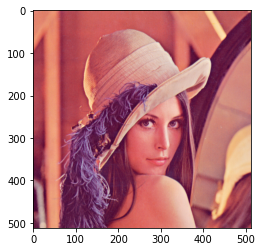

In [9]:
plt.imshow(img)
plt.show()

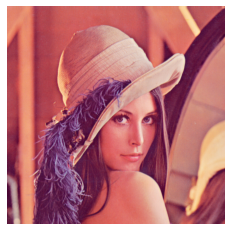

In [5]:
plt.imshow(img)
plt.axis('off')
plt.show()

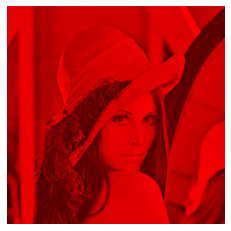

In [7]:
red = img.copy()
red[:, :, 1] = 0
red[:, :, 2] = 0

plt.imshow(red)
plt.axis('off')
plt.show()

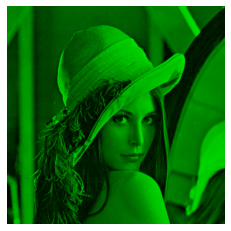

In [8]:
green = img.copy()
green[:, :, 0] = 0
green[:, :, 2] = 0

plt.imshow(green)
plt.axis('off')
plt.show()

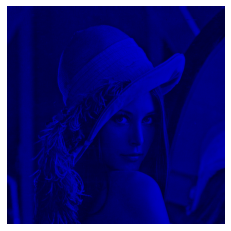

In [10]:
blue = img.copy()
blue[:, :, 0] = 0
blue[:, :, 1] = 0

plt.imshow(blue)
plt.axis('off')
plt.show()

Tensor Operation (Sum)

In [32]:
np.arange(4)

array([0, 1, 2, 3])

In [33]:
np.arange(4).reshape(2, 2)

array([[0, 1],
       [2, 3]])

In [23]:
x = np.arange(4).reshape(2, 2)
x

array([[0, 1],
       [2, 3]])

In [24]:
np.sum(x, axis = 0)

array([2, 4])

In [25]:
np.sum(x, axis = 1)

array([1, 5])

In [28]:
x = np.arange(8).reshape(2, 2, 2)
x

array([[[0, 1],
        [2, 3]],

       [[4, 5],
        [6, 7]]])

In [29]:
np.sum(x, axis = 0)

array([[ 4,  6],
       [ 8, 10]])

In [30]:
np.sum(x, axis = 1)

array([[ 2,  4],
       [10, 12]])

In [31]:
np.sum(x, axis = 2)

array([[ 1,  5],
       [ 9, 13]])

im2col (image to column)
- CNNs are operations which involve 4-dimensional tensors so that codes are complicated and take too much time for computation.
- 'im2col' allows us to convert 4-dimensional tensors into 2-dimensional tensors. This is because humans are familiar with matrix operations. Moreover, it accelerates the speed of computation.
- The figure below shows how raw data are converted into a matrix via flattenning. It may seem to be correct to call it im2row but it is not. So do not be confused. (Fig: H X W X C for each input image, H: the height of inputs, W: the width of inputs, C: the number of channels)
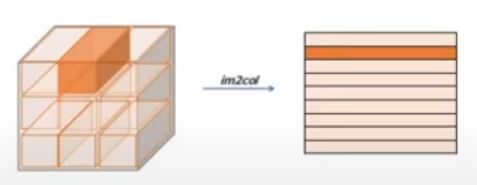
- For some images with low resolution, pixels may take up more memory space, which is not good. However, the advantage gained from reduced time far outweighs the aforementioned disadvantage.
    - Extract data (as big as the size of filters) based on the order by which convolution operations are executed, flatten, and insert each into the corresponding row of a matrix.
    - Flatten each filter and insert it into the corresponding column of another matrix.
    - Do matrix multiplication operation for two matrices.
    - Reshape the result as N X OH X OW X FN. (N: the number of inputs (batch size), OH: the output height of a CNN layer, OW: the output width of a CNN layer, FN: the number of filters)
    - Transpose the tensor as (0, 3, 1, 2). $\to$ N X FN X OH X OW

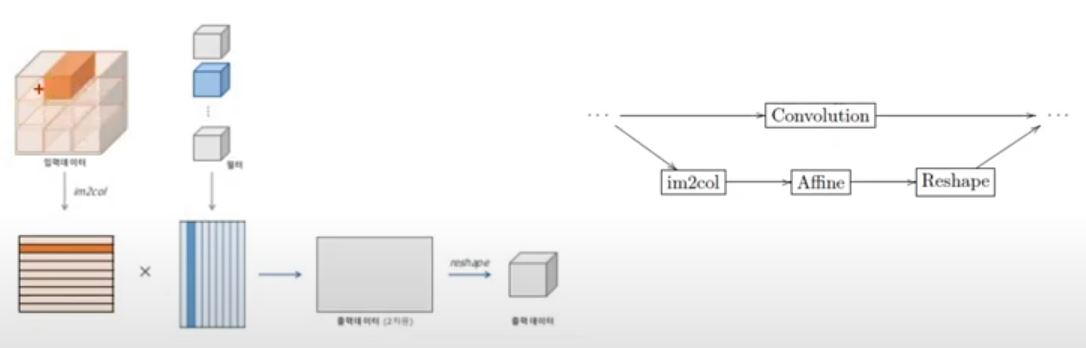

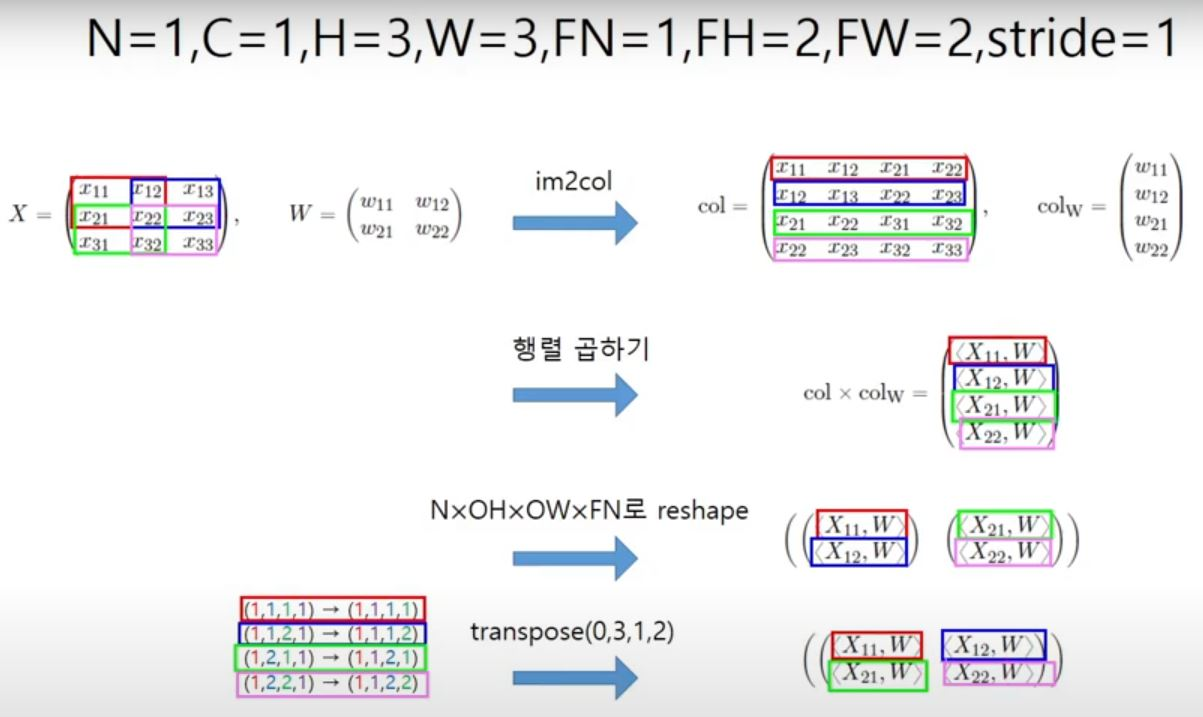

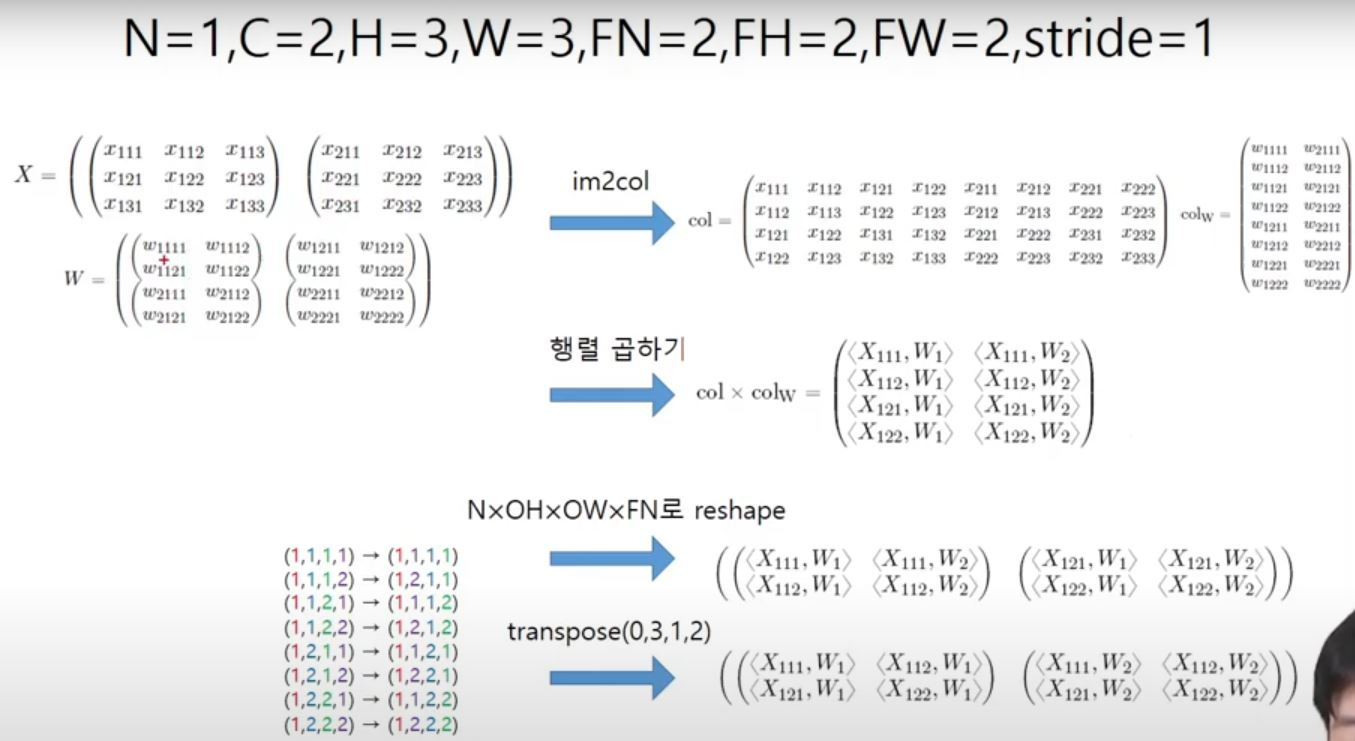

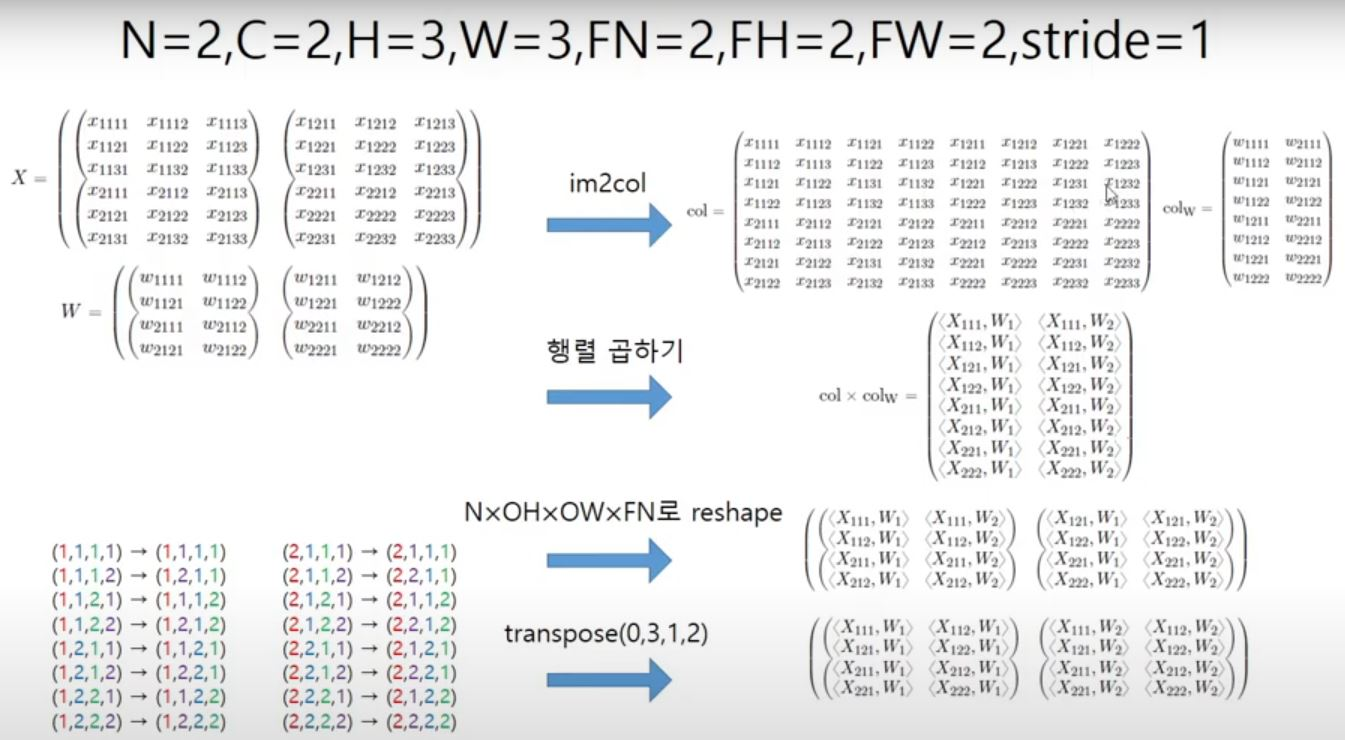

In [2]:
def im2col(input_data, filter_h, filter_w, stride = 1, pad = 0):
    """
    Convert images into 2-dimensional arrays (flattenning).
    
    Parameters
    ----------
    input_data: N X C X H X W
    filter_h
    filter_w
    stride: By how large step do you take for every convolution?
    pad: padding
    ----------
    """
    
    N, C, H, W = input_data.shape
    out_h = (H + 2 * pad - filter_h) // stride + 1
    out_w = (W + 2 * pad - filter_w) // stride + 1
    
    # zero-padding
    img = np.pad(input_data, [(0, 0), (0, 0), (pad, pad), (pad, pad)],
                 'constant')
    # Initialize the output of 'im2col'.
    col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))
    
    for y in range(filter_h):
        y_max = y + stride * out_h
        for x in range(filter_w):
            x_max = x + stride * out_w
            # the range of each convolution operation in images
            col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]
            
    col = col.transpose(0, 4, 5, 1, 2, 3).reshape(N * out_h * out_w, -1)
    return col

In [3]:
print('=' * 30)
print('N = 1, C = 1, H = 3, W = 3, FN = 1, FH = 2, FW = 2, stride = 1')
# Create a 4-dimensional tensor.
x = np.arange(9)
x = x.reshape(1, 1, 3, 3)

print('=' * 30)
print('Input Data: ')
print(x)
print('=' * 30)

y = im2col(x, 2, 2)

print('im2col: ')
print(y)

w = np.array([[1, 0], [1, 0]])

print('=' * 30)
print('Filter: ')
print(w)

# '-1': Automatically returns the reshaped NumPy array.
wc = w.reshape(1, -1).T

print('=' * 30)
print('Column Vectors: ')
print(wc)

product = np.dot(y, wc)

print('=' * 30)
print('im2col X Column Vector Filter: ')
print(product)

out = product.reshape(1, 2, 2, 1).transpose(0, 3, 1, 2)

print('=' * 30)
print('Output: ')
print(out)
print('=' * 30)

N = 1, C = 1, H = 3, W = 3, FN = 1, FH = 2, FW = 2, stride = 1
Input Data: 
[[[[0 1 2]
   [3 4 5]
   [6 7 8]]]]
im2col: 
[[0. 1. 3. 4.]
 [1. 2. 4. 5.]
 [3. 4. 6. 7.]
 [4. 5. 7. 8.]]
Filter: 
[[1 0]
 [1 0]]
Column Vectors: 
[[1]
 [0]
 [1]
 [0]]
im2col X Column Vector Filter: 
[[ 3.]
 [ 5.]
 [ 9.]
 [11.]]
Output: 
[[[[ 3.  5.]
   [ 9. 11.]]]]


In [14]:
print('=' * 30)
print('N = 1, C = 1, H = 3, W = 3, FN = 1, FH = 2, FW = 2, stride = 1')
# Create a 4-dimensional tensor.
x = np.arange(18)
x = x.reshape(1, 2, 3, 3)

print('=' * 30)
print('Input Data: ')
print(x)
print('=' * 30)

y = im2col(x, 2, 2)

print('im2col: ')
print(y)

w = np.array([[[[1, 0], [1, 0]], [[1, 1], [0, 0]]],
              [[[0, 1], [0, 1]], [[0, 0], [1, 1]]]])

print('=' * 30)
print('Filter: ')
print(w)

# '-1': Automatically returns the reshaped NumPy array.
wc = w.reshape(2, -1).T

print('=' * 30)
print('Column Vectors: ')
print(wc)

product = np.dot(y, wc)

print('=' * 30)
print('im2col X Column Vector Filter: ')
print(product)

out = product.reshape(1, 2, 2, 2).transpose(0, 3, 1, 2)

print('=' * 30)
print('Output: ')
print(out)
print('=' * 30)

N = 1, C = 1, H = 3, W = 3, FN = 1, FH = 2, FW = 2, stride = 1
Input Data: 
[[[[ 0  1  2]
   [ 3  4  5]
   [ 6  7  8]]

  [[ 9 10 11]
   [12 13 14]
   [15 16 17]]]]
im2col: 
[[ 0.  1.  3.  4.  9. 10. 12. 13.]
 [ 1.  2.  4.  5. 10. 11. 13. 14.]
 [ 3.  4.  6.  7. 12. 13. 15. 16.]
 [ 4.  5.  7.  8. 13. 14. 16. 17.]]
Filter: 
[[[[1 0]
   [1 0]]

  [[1 1]
   [0 0]]]


 [[[0 1]
   [0 1]]

  [[0 0]
   [1 1]]]]
Column Vectors: 
[[1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]]
im2col X Column Vector Filter: 
[[22. 30.]
 [26. 34.]
 [34. 42.]
 [38. 46.]]
Output: 
[[[[22. 26.]
   [34. 38.]]

  [[30. 34.]
   [42. 46.]]]]


In [15]:
print('=' * 30)
print('N = 1, C = 1, H = 3, W = 3, FN = 1, FH = 2, FW = 2, stride = 1')
# Create a 4-dimensional tensor.
x = np.arange(36)
x = x.reshape(2, 2, 3, 3)

print('=' * 30)
print('Input Data: ')
print(x)
print('=' * 30)

y = im2col(x, 2, 2)

print('im2col: ')
print(y)

w = np.array([[[[1, 0], [1, 0]], [[1, 1], [0, 0]]],
              [[[0, 1], [0, 1]], [[0, 0], [1, 1]]]])

print('=' * 30)
print('Filter: ')
print(w)

# '-1': Automatically returns the reshaped NumPy array.
wc = w.reshape(2, -1).T

print('=' * 30)
print('Column Vectors: ')
print(wc)

product = np.dot(y, wc)

print('=' * 30)
print('im2col X Column Vector Filter: ')
print(product)

out = product.reshape(2, 2, 2, 2).transpose(0, 3, 1, 2)

print('=' * 30)
print('Output: ')
print(out)
print('=' * 30)

N = 1, C = 1, H = 3, W = 3, FN = 1, FH = 2, FW = 2, stride = 1
Input Data: 
[[[[ 0  1  2]
   [ 3  4  5]
   [ 6  7  8]]

  [[ 9 10 11]
   [12 13 14]
   [15 16 17]]]


 [[[18 19 20]
   [21 22 23]
   [24 25 26]]

  [[27 28 29]
   [30 31 32]
   [33 34 35]]]]
im2col: 
[[ 0.  1.  3.  4.  9. 10. 12. 13.]
 [ 1.  2.  4.  5. 10. 11. 13. 14.]
 [ 3.  4.  6.  7. 12. 13. 15. 16.]
 [ 4.  5.  7.  8. 13. 14. 16. 17.]
 [18. 19. 21. 22. 27. 28. 30. 31.]
 [19. 20. 22. 23. 28. 29. 31. 32.]
 [21. 22. 24. 25. 30. 31. 33. 34.]
 [22. 23. 25. 26. 31. 32. 34. 35.]]
Filter: 
[[[[1 0]
   [1 0]]

  [[1 1]
   [0 0]]]


 [[[0 1]
   [0 1]]

  [[0 0]
   [1 1]]]]
Column Vectors: 
[[1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]]
im2col X Column Vector Filter: 
[[ 22.  30.]
 [ 26.  34.]
 [ 34.  42.]
 [ 38.  46.]
 [ 94. 102.]
 [ 98. 106.]
 [106. 114.]
 [110. 118.]]
Output: 
[[[[ 22.  26.]
   [ 34.  38.]]

  [[ 30.  34.]
   [ 42.  46.]]]


 [[[ 94.  98.]
   [106. 110.]]

  [[102. 106.]
   [114. 118.]]]]


Convolution Layer Class

In [4]:
class Convolution:
    def __init__(self, W, b, stride = 1, pad = 0):
        self.W = W
        self.b = b
        self.stride = stride
        self.pad = pad
        
        # for back propagation
        self.x = None
        self.col = None
        self.col_W = None
        
        # gradients
        self.dW = None
        self.db = None
        
    def forward(self, x):
        FN, C, FH, FW = self.W.shape
        N, C, Height, Width = x.shape
        out_h = 1 + int((Height + 2 * self.pad - FH) / self.stride)
        out_w = 1 + int((Width + 2 * self.pad - FW) / self.stride)
        
        col = im2col(x, FH, FW, self.stride, self.pad)
        col_W = self.W.reshape(FN, -1).T
        
        # There is a bias for each filter.
        out = np.dot(col, col_W) + self.b # dot product: convolution
        out = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2)
        
        self.x = x
        self.col = col
        self.col_W = col_W
        
        return out
    
    def backward(self, dout):
        FN, C, FH, FW = self.W.shape
        dout = dout.transpose(0, 2, 3, 1).reshape(-1, FN)
        
        self.db = np.sum(dout, axis = 0)
        self.dW = np.dot(self.col.T, dout)
        self.dW = self.dW.transpose(1, 0).reshape(FN, C, FH, FW)
        
        dcol = np.dot(dout, self.col_W.T)
        dx = col2im(dcol, self.x.shape, FH, FW, self.stride, self.pad)
        
        return dx

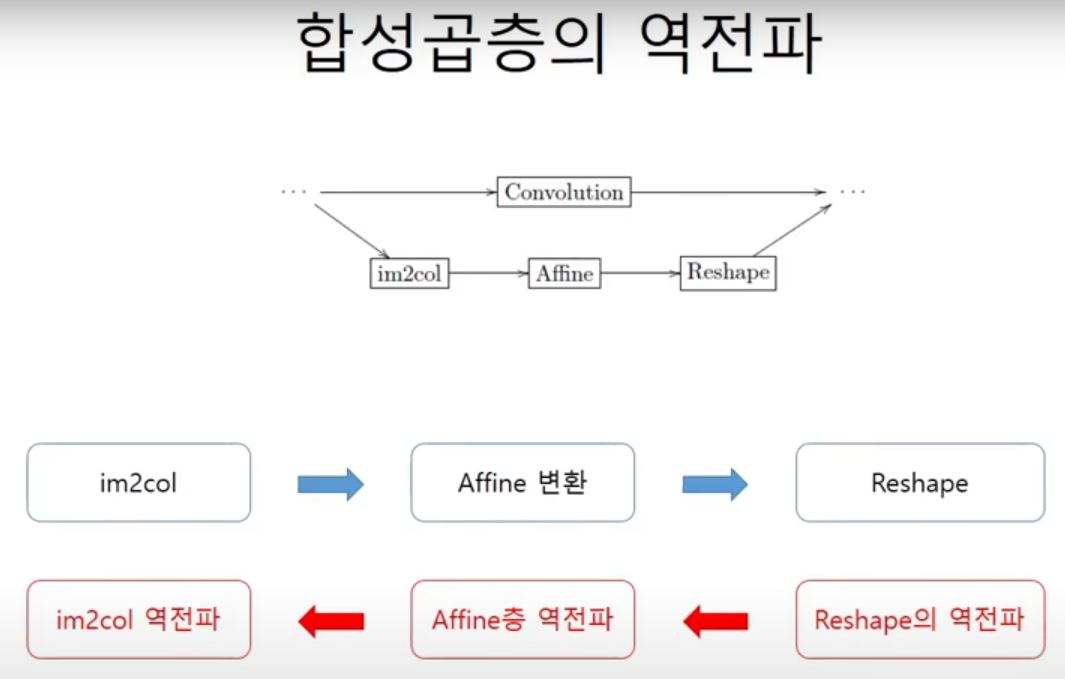

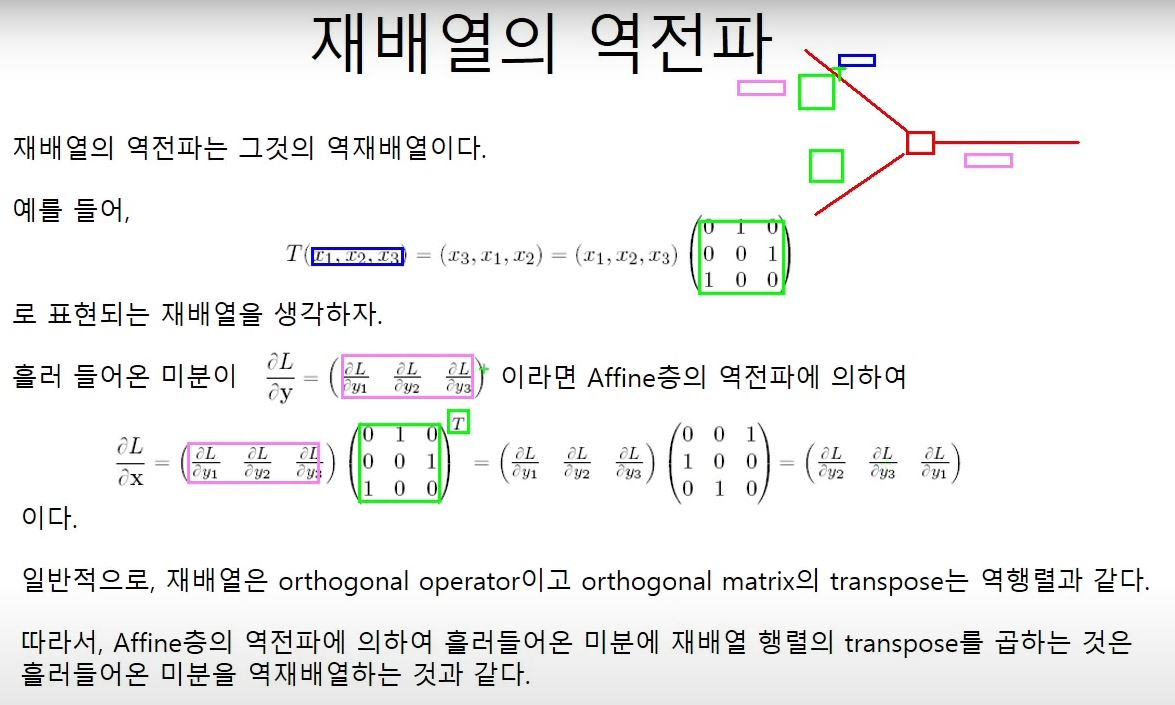

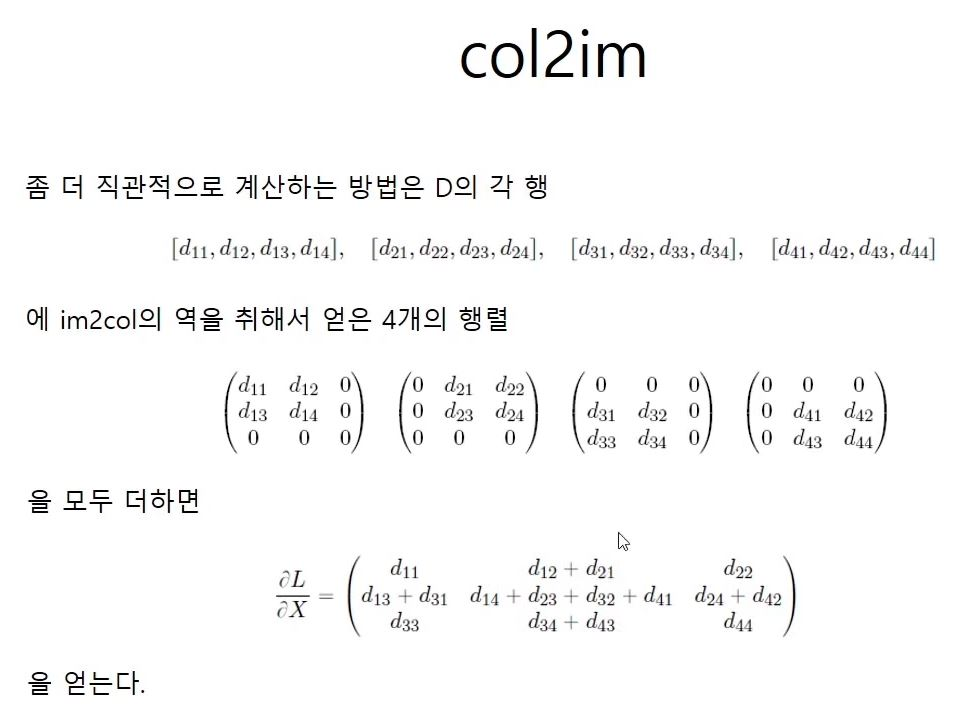

In [5]:
# col2im -> the back propagation of 'im2col'
def col2im(col, input_shape, filter_h, filter_w, stride = 1, pad = 0):
    """
    Convert 2-dimensional arrays into images
    in the process of back propagation.
    
    Parameters
    ----------
    col: 2-dimensional arrays
    input_shape: the original image shape
    filter_h
    filter_w
    stride: By how large step do you take for every convolution?
    pad: padding
    ----------
    """
    
    N, C, H, W = input_shape
    out_h = (H + 2 * pad - filter_h) // stride + 1
    out_w = (W + 2 * pad - filter_w) // stride + 1
    # col: gradients via back propagation from the previous layer
    col = col.reshape(N, out_h, out_w, C, filter_h, filter_w).transpose(0, 3, 4, 5, 1, 2)
    
    # Initialize a tensor for gradient
    # with the same size of the original image. -> 'img'
    img = np.zeros((N, C, H + 2 * pad + stride - 1, W + 2 * pad + stride - 1))
    for y in range(filter_h):
        y_max = y + stride * out_h
        for x in range(filter_w):
            x_max = x + stride * out_w
            img[:, :, y:y_max:stride, x:x_max:stride] += col[:, :, y, x, :, :]
            
    return img[:, :, pad:H + pad, pad:W + pad]

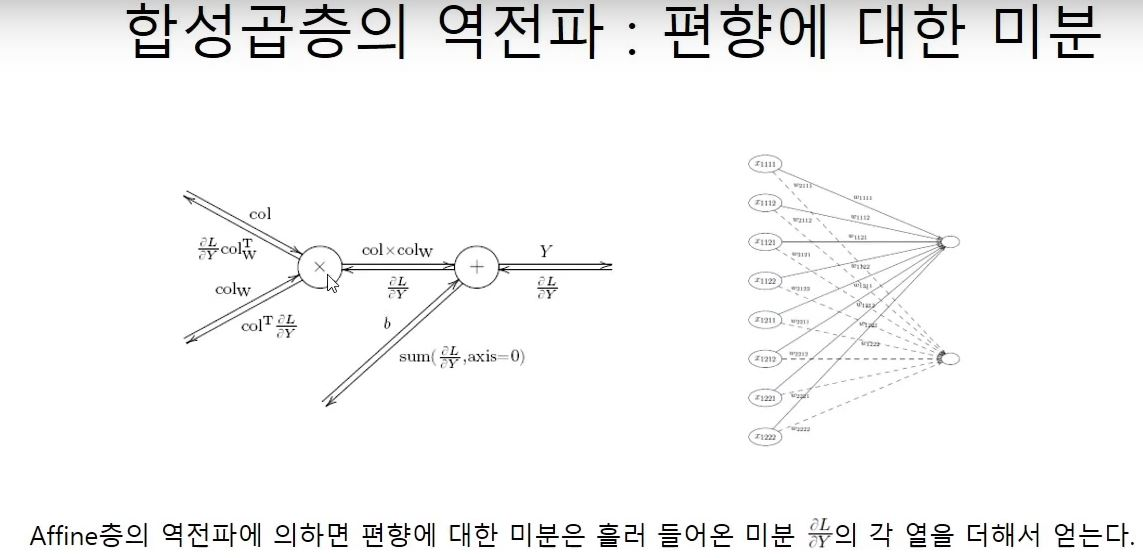

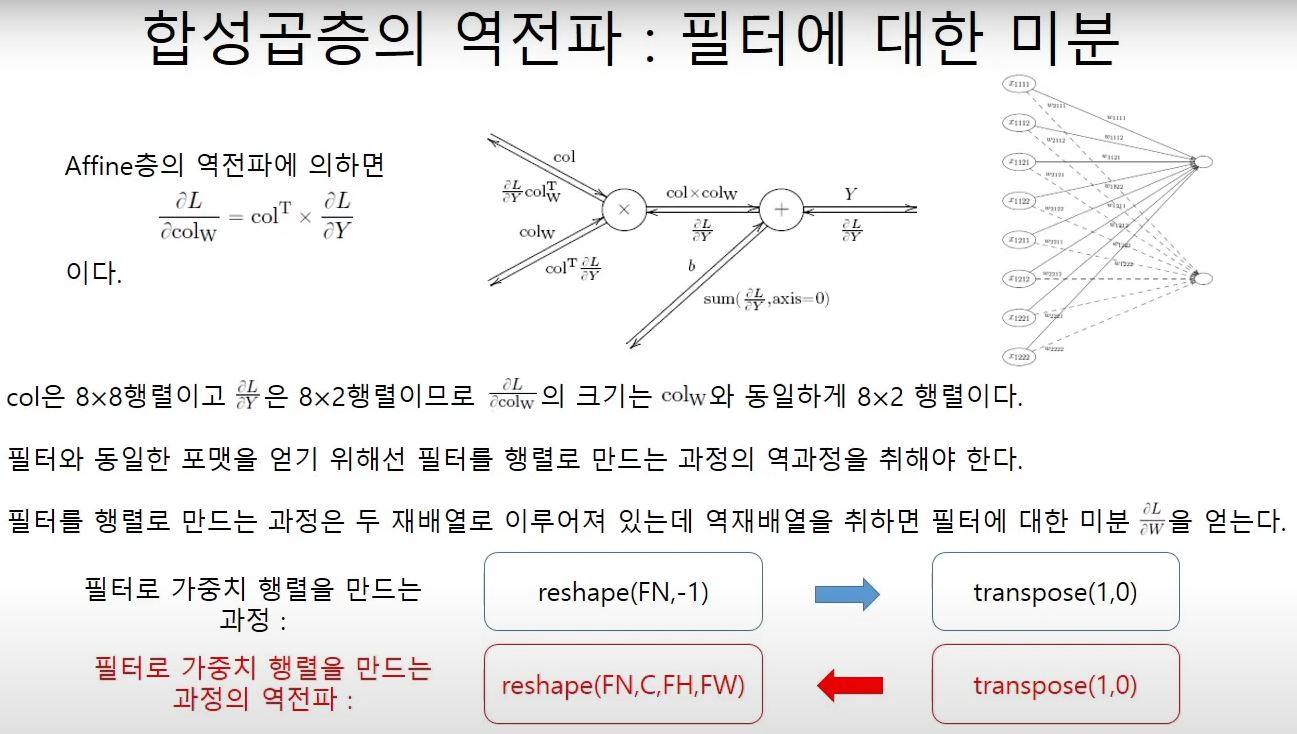

MaxPooling Layer

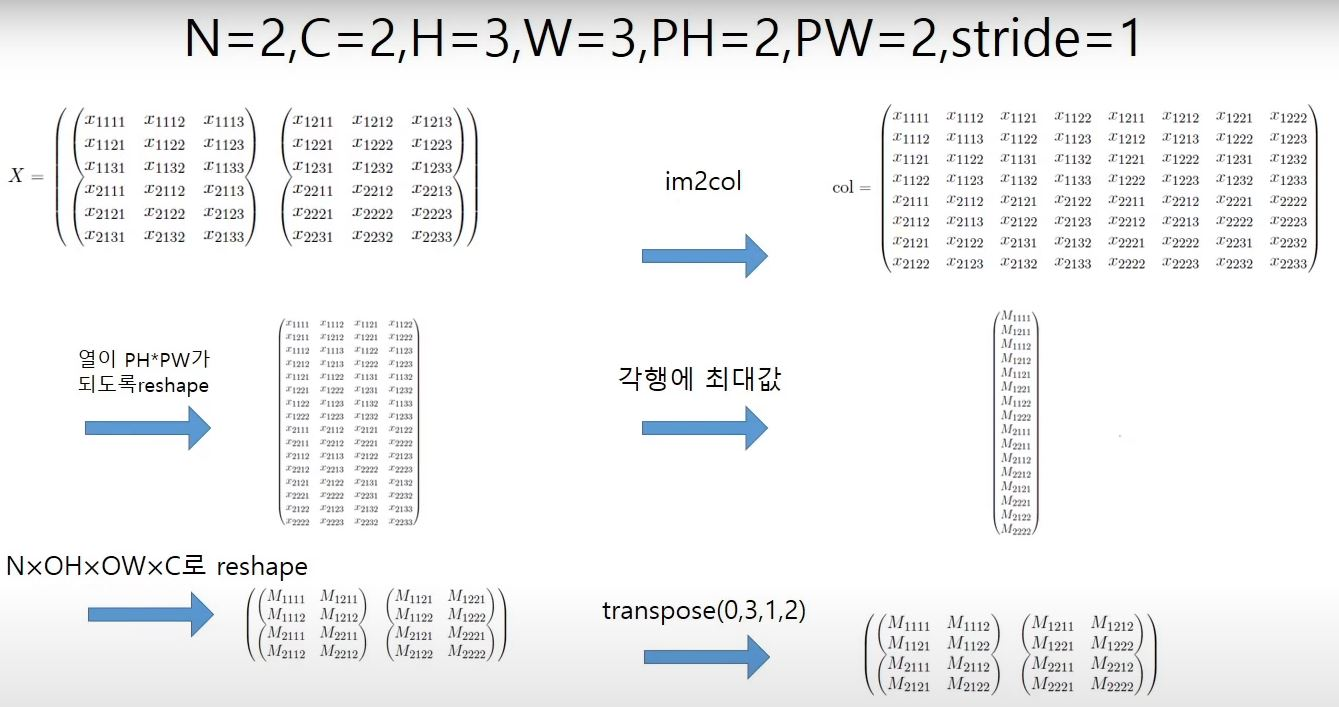

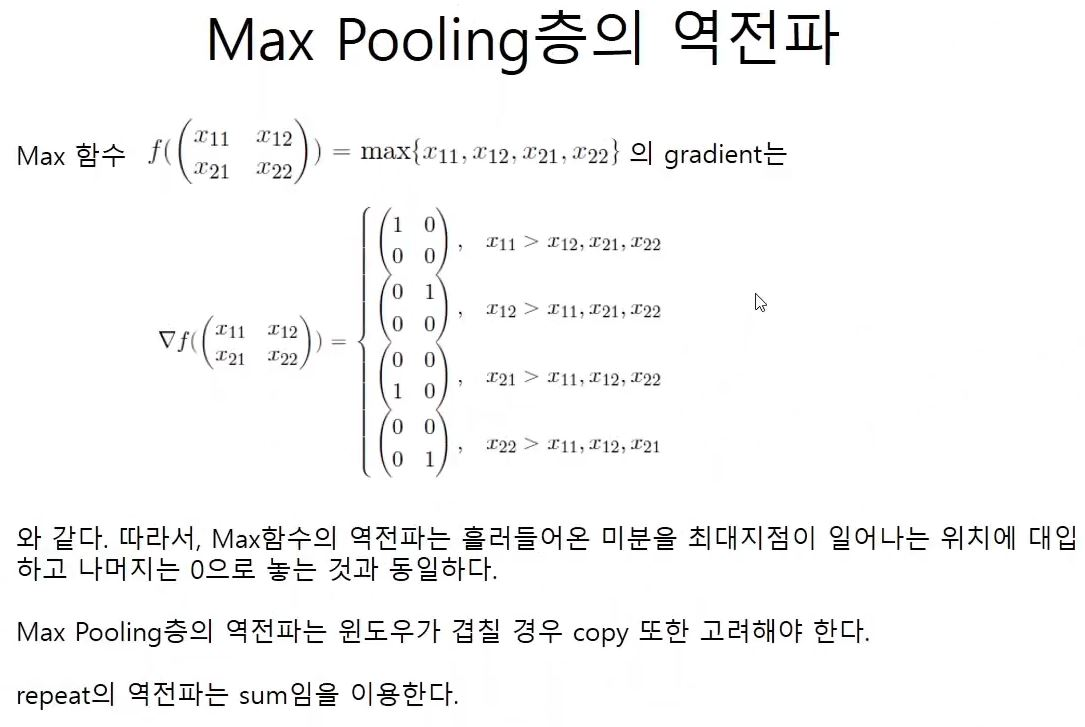

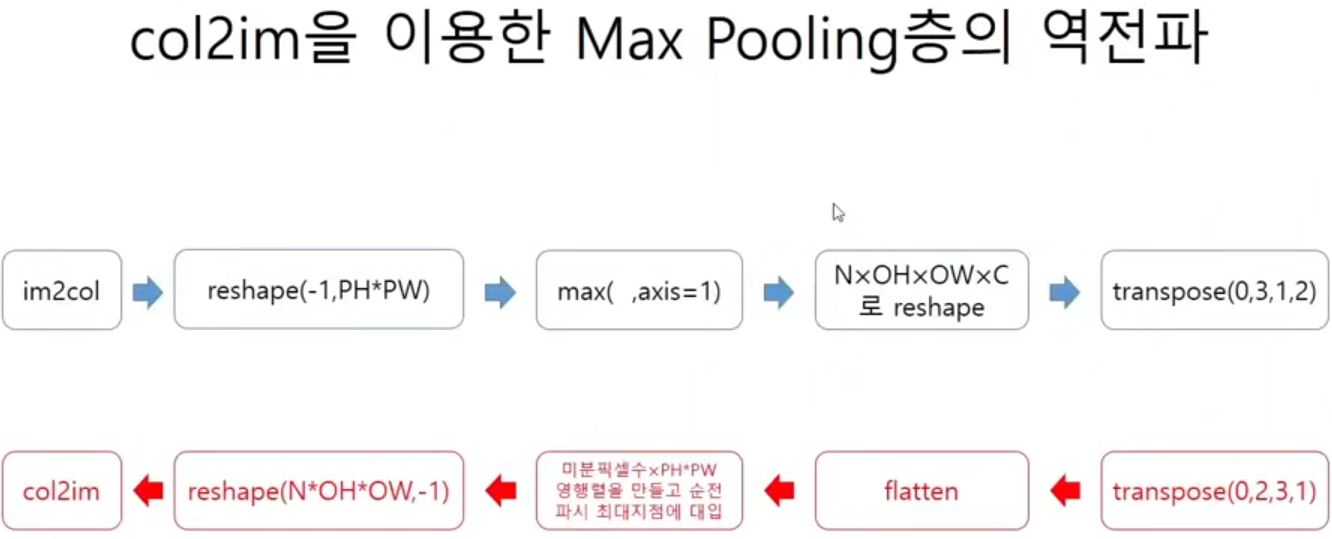

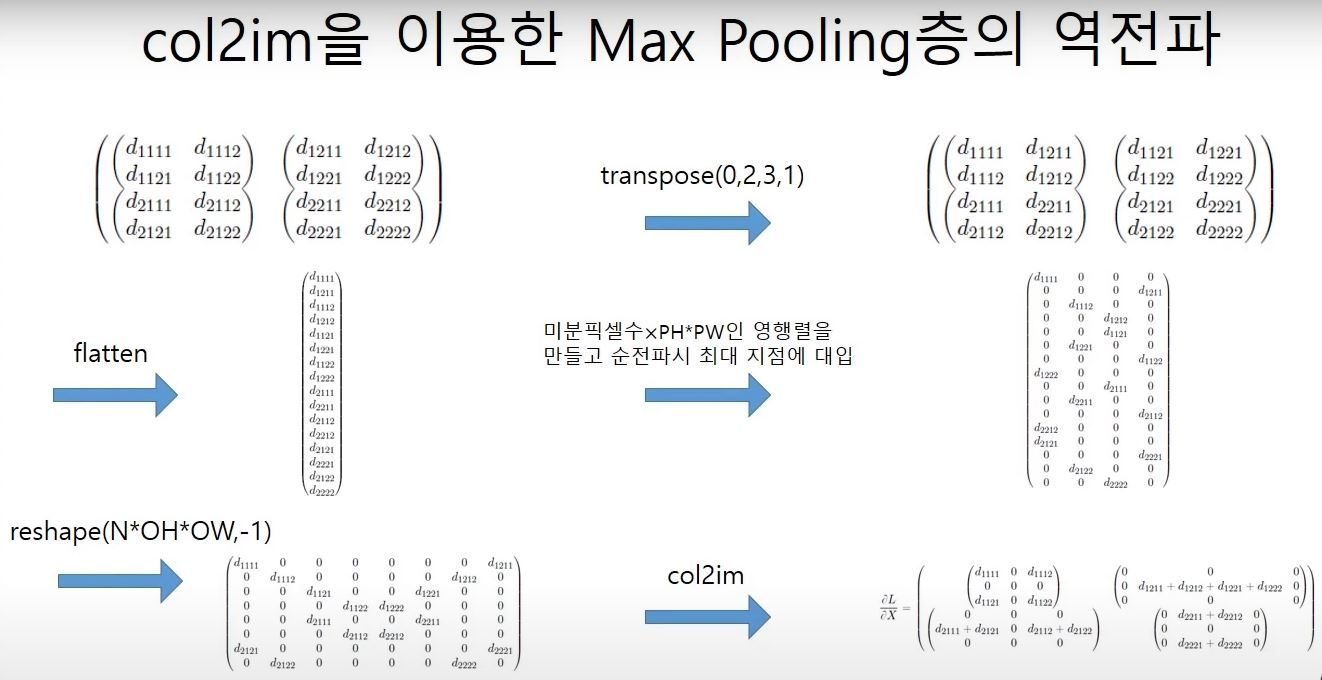

In [6]:
class Pooling:
    def __init__(self, pool_h, pool_w, stride = 1, pad = 0):
        self.pool_h = pool_h
        self.pool_w = pool_w
        self.stride = stride
        self.pad = pad
        
        self.x = None
        self.arg_max = None
        
    def forward(self, x):
        N, C, H, W = x.shape
        out_h = int(1 + (H - self.pool_h) / self.stride)
        out_w = int(1 + (W - self.pool_w) / self.stride)
        
        col = im2col(x, self.pool_h, self.pool_w, self.stride, self.pad)
        col = col.reshape(-1, self.pool_h * self.pool_w)
        
        arg_max = np.argmax(col, axis = 1)
        out = np.max(col, axis = 1)
        out = out.reshape(N, out_h, out_w, C).transpose(0, 3, 1, 2)
        
        self.x = x
        # Store 'arg_max' (gradient matrix) for back propagation.
        self.arg_max = arg_max
        
        return out
    
    def backward(self, dout):
        dout = dout.transpose(0, 2, 3, 1)
        
        pool_size = self.pool_h * self.pool_w
        dmax = np.zeros((dout.size, pool_size))
        dmax[np.arange(self.arg_max.size), self.arg_max.flatten()] = dout.flatten()
        dmax = dmax.reshape(dout.shape + (pool_size, ))
        
        dcol = dmax.reshape(dmax.shape[0] * dmax.shape[1] * dmax.shape[2], -1)
        dx = col2im(dcol, self.x.shape, self.pool_h, self.pool_w, self.stride, self.pad)
        
        return dx

What does the filter mean in CNNs?

[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


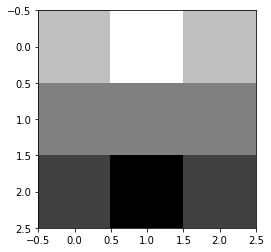

In [7]:
# Sobel Filter (horizontal)
w_y = np.array([[[[1, 2, 1], [0, 0, 0], [-1, -2, -1]]]])
b = 0
print(w_y[0][0])
plt.imshow(w_y.reshape(w_y.shape[2], w_y.shape[3]), cmap = plt.cm.gray)
plt.show()

A Horizontal Image: 
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


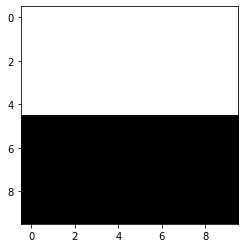

In [62]:
img = np.zeros((10, 10))
img[:5, :] = 1.
print('A Horizontal Image: ')
print(img)
plt.imshow(img, cmap = plt.cm.gray)
plt.show()

Convolution of a horizontal image and the Sobel filter: 
[[-1.39434547 -1.39434547 -1.39434547 -1.39434547 -1.39434547 -1.39434547]
 [-1.18521641 -1.18521641 -1.18521641 -1.18521641 -1.18521641 -1.18521641]
 [-1.12568392 -1.12568392 -1.12568392 -1.12568392 -1.12568392 -1.12568392]
 [-0.80307058 -0.80307058 -0.80307058 -0.80307058 -0.80307058 -0.80307058]
 [-0.55276866 -0.55276866 -0.55276866 -0.55276866 -0.55276866 -0.55276866]
 [ 0.          0.          0.          0.          0.          0.        ]]


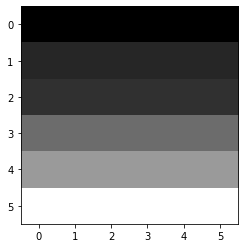

In [63]:
# The Sobel filter above can detect horizontal edges.
img = img.reshape(1, 1, *img.shape)
conv_layer = Convolution(w, b)
out = conv_layer.forward(img)
# imshow method does not accept rank-4 tensors.
out = out.reshape(out.shape[2], out.shape[3])
print('Convolution of a horizontal image and the Sobel filter: ')
print(out)
plt.imshow(out, cmap = plt.cm.gray)
plt.show()

A Vertical Image: 
[[1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]]


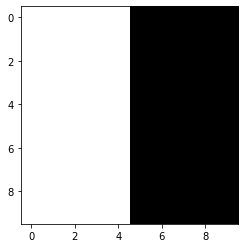

Convolution of a vertical image and the Sobel filter
[[-1.39434547 -1.33578075 -1.35257156 -0.93761107 -0.26890038  0.        ]
 [-1.39434547 -1.33578075 -1.35257156 -0.93761107 -0.26890038  0.        ]
 [-1.39434547 -1.33578075 -1.35257156 -0.93761107 -0.26890038  0.        ]
 [-1.39434547 -1.33578075 -1.35257156 -0.93761107 -0.26890038  0.        ]
 [-1.39434547 -1.33578075 -1.35257156 -0.93761107 -0.26890038  0.        ]
 [-1.39434547 -1.33578075 -1.35257156 -0.93761107 -0.26890038  0.        ]]


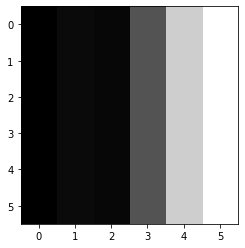

In [70]:
# The Sobel filter above cannot detect vertical edges.
img = np.zeros((10, 10))
img[:, :5] = 1.
print('A Vertical Image: ')
print(img)
plt.imshow(img, cmap = plt.cm.gray)
plt.show()
img = img.reshape(1, 1, *img.shape)
out = conv_layer.forward(img)
out = out.reshape(out.shape[2], out.shape[3])
print('Convolution of a vertical image and the Sobel filter')
print(out)
plt.imshow(out, cmap = plt.cm.gray)
plt.show()

FYI: vertical Sobel filters

```python
np.array([[1 0 -1], [2, 0 -2], [1, 0 -1]])
```

CNN Back Propagation

In [10]:
from collections import OrderedDict

In [11]:
class ReLU:
    def __init__(self):
        self.mask = None

    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0

        return out

    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout

        return dx

In [12]:
class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        
        self.x = None
        self.original_x_shape = None
        # gradients
        self.dW = None
        self.db = None

    def forward(self, x):
        # Convert 'x' into matrix form.
        self.original_x_shape = x.shape
        x = x.reshape(x.shape[0], -1)
        self.x = x

        out = np.dot(self.x, self.W) + self.b

        return out

    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis = 0)
        
        # Data Type conversion (inverse of forward)
        dx = dx.reshape(*self.original_x_shape)
        return dx

In [13]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # Return values as indices if training data are one-hot vectors.
    if t.size == y.size:
        t = t.argmax(axis = 1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

In [14]:
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis = 0)
        y = np.exp(x) / np.sum(np.exp(x), axis = 0)
        return y.T 

    # in case that overflow takes place..
    x = x - np.max(x)
    return np.exp(x) / np.sum(np.exp(x))

In [15]:
class SoftMaxWithLoss:
    def __init__(self):
        self.loss = None # loss function
        self.y = None    # SoftMax output
        self.t = None    # Ground Truth (one-hot encoding)
        
    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
        
        return self.loss

    def backward(self, dout = 1):
        batch_size = self.t.shape[0]
        if self.t.size == self.y.size: # if one-hot encoding groud truth..
            dx = (self.y - self.t) / batch_size
        else:
            dx = self.y.copy()
            dx[np.arange(batch_size), self.t] -= 1
            dx = dx / batch_size
        
        return dx

In [16]:
class SimpleConvNet:
    """
    Convolution - ReLU1 - Pooling - Affine1 - ReLU2 - Affine2 - SoftMax
    """
    
    def __init__(self, input_dim = (1, 28, 28),
                 conv_param = {'num_filters': 30, 'filter_size': 5,
                               'pad': 0, 'stride': 1},
                 num_hidden_neurons = 100, output_size = 10,
                 weight_init_std = 0.01):
        num_filters = conv_param['num_filters']
        filter_size = conv_param['filter_size']
        filter_pad = conv_param['pad']
        filter_stride = conv_param['stride']
        input_size = input_dim[1] # input_dim[1] = input_dim[2]
        conv_output_size = (input_size - filter_size + 2 * filter_pad) / filter_stride + 1
        pool_output_size = int(num_filters * (conv_output_size / 2) ** 2)
        
        # Initialize weights. (not He Initialization)
        self.params =  {}
        self.params['W1'] = weight_init_std * \
                            np.random.randn(num_filters, input_dim[0],
                                            filter_size, filter_size)
        self.params['b1'] = np.zeros(num_filters)
        self.params['W2'] = weight_init_std * \
                            np.random.randn(pool_output_size, num_hidden_neurons)
        self.params['b2'] = np.zeros(num_hidden_neurons)
        self.params['W3'] = weight_init_std * \
                            np.random.randn(num_hidden_neurons, output_size)
        self.params['b3'] = np.zeros(output_size)
        
        # creating layers
        self.layers = OrderedDict()
        self.layers['Conv1'] = Convolution(self.params['W1'],
                                           self.params['b1'],
                                           conv_param['stride'],
                                           conv_param['pad'])
        self.layers['ReLU1'] = ReLU()
        self.layers['Pooling1'] = Pooling(pool_h = 2, pool_w = 2, stride = 2)
        self.layers['Affine1'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['ReLU2'] = ReLU()
        self.layers['Affine2'] = Affine(self.params['W3'], self.params['b3'])
        self.last_layer = SoftMaxWithLoss()
        
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        return x
        
    def loss(self, x, t):
        """
        Loss Function Parameters
        ----------
        x: input data
        t: ground truth
        ----------
        """
        
        y = self.predict(x)
        return self.last_layer.forward(y, t)
    
    def accuracy(self, x, t, batch_size = 100):
        if t.ndim != 1 : t = np.argmax(t, axis = 1)
            
        acc = 0.0
        
        for i in range(int(x.shape[0] / batch_size)):
            tx = x[i * batch_size:(i + 1) * batch_size]
            tt = t[i * batch_size:(i + 1) * batch_size]
            y = self.predict(tx)
            y = np.argmax(y, axis = 1)
            acc += np.sum(y == tt)
        
        return acc / x.shape[0]
    
    def gradient(self, x, t):
        """
        Back Propagation Parameters
        ----------
        x: input data
        t: ground truth
        ----------
        """
        
        # forward
        self.loss(x, t)
        
        # backward
        dout = 1
        dout = self.last_layer.backward(dout)
        
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)
            
        # Store the results.
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Conv1'].dW, self.layers['Conv1'].db
        grads['W2'], grads['b2'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W3'], grads['b3'] = self.layers['Affine2'].dW, self.layers['Affine2'].db
        
        return grads
    
    def save_params(self, file_name = 'params.pkl'):
        params = {}
        for key, val in self.params.items():
            params[key] = val
        with open(file_name, 'wb') as f:
            pickle.dump(params, f)
        
    def load_params(self, file_name = 'params.pkl'):
        with open(file_name, 'rb') as f:
            params = pickle.load(f)
        for key, val in params.items():
            self.params[key] = val
            
        for i, key in enumerate(['Conv1', 'Affine1', 'Affine2']):
            self.layers[key].W = self.params['W' + str(i + 1)]
            self.layers[key].b = self.params['b' + str(i + 1)]

Optimizers

In [17]:
class SGD:
    """
    stochastic gradient descent
    lr: learning rate hyperparameter
    """
    
    def __init__(self, lr = 0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]


class Momentum:
    """
    Momentum SGD
    lr: learning rate hyperparameter (eta in the above)
    momentum: momentum hyperparameter (alpha in the above)
    """
    
    def __init__(self, lr = 0.01, momentum = 0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                # initial momentum -> 0
                self.v[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.v[key] = self.momentum * self.v[key] - self.lr * grads[key]
            params[key] += self.v[key]


class Nesterov:
    """
    Nesterov's Accelerated Gradient
    More aggressive than Momentum optimizer
    However, the backpropagation process needs to be modified
    to implement NAG. See the formula, f, above.
    This is the reason why it can hardly be applied to deep learning.
    Instead, we can use Bengio's approximation like below.
    lr: learning rate hyperparameter (eta in the above)
    momentum: momentum hyperparameter (alpha in the above)
    """
    
    def __init__(self, lr = 0.01, momentum = 0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
                
        for key in params.keys():
            params[key] += self.momentum * self.momentum * self.v[key]
            params[key] -= (1 + self.momentum) * self.lr * grads[key]
            self.v[key] *= self.momentum
            self.v[key] -= self.lr * grads[key]

class AdaGrad:
    """
    AdaGrad Optimizer
    lr: a learning rate component (eta in the above)
    self.h: inversely related to lr
    """
    def __init__(self, lr = 0.01):
        self.lr = lr # eta in the above
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.h[key] += grads[key] * grads[key] # Hadamard product
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key] + 1e-7))

class RMSProp:
    """
    RMSProp Optimizer
    lr: learning rate hyperparameter (eta in the above)
    gamma: decaying rate hyperparameter (gamma in the above)
    """
    def __init__(self, lr = 0.01, gamma = 0.99):
        self.lr = lr
        self.gamma = gamma
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.h[key] = self.gamma * self.h[key] \
            + (1- self.gamma) * grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key] + 1e-7))

class Adam:
    """
    Adam Optimizer
    lr: a learning rate component (eta in the above)
    beta1: a hyperparameter for the Momentum Part
    beta2: a hyperparameter for the RMSProp Part (varying learning rate)
    """
    
    def __init__(self, lr = 0.001, beta1 = 0.9, beta2 = 0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
                
        self.iter += 1
        # modified learning rate (to replace m and v with m_hat and v_hat)
        lr_t = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / \
            (1.0 - self.beta1**self.iter)
        for key in params.keys():
            # Update the Momentum hyperparameter.
            self.m[key] += (1 - self.beta1) * (grads[key] -self.m[key])
            # Update the RMSProp hyperparameter.
            # Hadamard product can be easily implemented via NumPy operations.
            self.v[key] += (1 - self.beta2) * (grads[key]**2 -self.v[key])
            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)

Trainer

In [18]:
class Trainer:
    def __init__(self, network, X_train, y_train, X_test, y_test,
                 epochs = 20, mini_batch_size = 100,
                 optimizer = 'SGD', optimizer_param = {'lr': 0.01},
                 evaluate_sample_num_per_epoch = None,
                 verbose = True):
        self.network = network
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.epochs = epochs
        self.batch_size = mini_batch_size
        self.evaluate_sample_num_per_epoch = evaluate_sample_num_per_epoch
        self.verbose = verbose
        
        # optimizer
        optimizer_class_dict = {'sgd': SGD, 'momentum': Momentum,
                                'nesterov': Nesterov, 'adagrad': AdaGrad,
                                'rmsprop': RMSProp, 'adam': Adam}
        self.optimizer = optimizer_class_dict[optimizer.lower()](**optimizer_param)
        
        self.train_size = X_train.shape[0]
        self.iter_per_epoch = max(self.train_size / mini_batch_size, 1)
        self.max_iter = int(epochs * self.iter_per_epoch)
        self.current_iter = 0
        self.current_epoch = 0
        
        self.train_loss_list = []
        self.train_acc_list = []
        self.test_acc_list = []
        
    def train_step(self):
        batch_mask = np.random.choice(self.train_size, self.batch_size)
        X_batch = self.X_train[batch_mask]
        y_batch = self.y_train[batch_mask]
        
        grads = self.network.gradient(X_batch, y_batch)
        self.optimizer.update(self.network.params, grads)
        
        loss = self.network.loss(X_batch, y_batch)
        self.train_loss_list.append(loss)
        if self.verbose: print("Training Loss: " + str(loss))
            
        if self.current_iter % self.iter_per_epoch == 0:
            self.current_epoch += 1
            
            X_train_sample, y_train_sample = self.X_train, self.y_train
            X_test_sample, y_test_sample = self.X_test, self.y_test
            if not self.evaluate_sample_num_per_epoch is None:
                t = self.evaluate_sample_num_per_epoch
                X_train_sample, y_train_sample = self.X_train[:t], self.y_train[:t]
                X_test_sample, y_test_sample = self.X_test[:t], self.y_test[:t]
            train_acc = self.network.accuracy(X_train_sample, y_train_sample)
            test_acc = self.network.accuracy(X_test_sample, y_test_sample)
            self.train_acc_list.append(train_acc)
            self.test_acc_list.append(test_acc)
            
            if self.verbose: print("=== Epoch: " + str(self.current_epoch) + \
                                   ", Training Acc: " + str(train_acc) + \
                                   ", Test Acc: " + str(test_acc) + "===")
        self.current_iter += 1
        
    def train(self):
        for i in range(self.max_iter):
            self.train_step()
            
        test_acc = self.network.accuracy(self.X_test, self.y_test)
        
        if self.verbose:
            print("=" * 10 + " Final Test Accuracy " + "=" * 10)
            print("Test Accuracy: " + str(test_acc))

In [19]:
from keras.datasets import mnist
import pickle

In [20]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [24]:
X_train = X_train.reshape(60000, 1, 28, 28)
X_test = X_test.reshape(10000, 1, 28, 28)

In [193]:
max_epochs = 20

In [194]:
network = SimpleConvNet(input_dim = (1, 28, 28),
                        conv_param = {'num_filters': 30, 'filter_size': 5,
                                      'pad': 0, 'stride': 1},
                        num_hidden_neurons = 100, output_size = 10,
                        weight_init_std = 0.01)
trainer = Trainer(network, X_train, y_train, X_test, y_test,
                  epochs = max_epochs, mini_batch_size = 100,
                  optimizer = 'Adam', optimizer_param = {'lr': 0.001},
                  evaluate_sample_num_per_epoch = 1000)

In [195]:
trainer.train()

Training Loss: 2.0061432148537075
=== Epoch: 1, Training Acc: 0.11, Test Acc: 0.119===
Training Loss: 1.7004575029136253
Training Loss: 1.5603998258834288
Training Loss: 1.1464578148437292
Training Loss: 1.0419355828159569
Training Loss: 0.7387765889060798
Training Loss: 0.6703912740844831
Training Loss: 0.5438679146608718
Training Loss: 0.5598555095517221
Training Loss: 0.5710153872580132
Training Loss: 0.5111174166147868
Training Loss: 0.5935302759904623
Training Loss: 0.36151365007465214
Training Loss: 0.3393318237319175
Training Loss: 0.5642140770962087
Training Loss: 0.29665581315254025
Training Loss: 0.261750835182761
Training Loss: 0.26370089835524957
Training Loss: 0.4358985369035874
Training Loss: 0.24875877230460783
Training Loss: 0.3973767971294344
Training Loss: 0.1650114704849302
Training Loss: 0.28901866098211193
Training Loss: 0.23331276167779136
Training Loss: 0.26624062709405893
Training Loss: 0.34192750135002803
Training Loss: 0.3334947267979198
Training Loss: 0.46963

Training Loss: 0.061441928873125606
Training Loss: 0.03577308737200243
Training Loss: 0.022761008282063996
Training Loss: 0.03966768519134934
Training Loss: 0.018511745526043854
Training Loss: 0.06479728479803418
Training Loss: 0.05326679936384342
Training Loss: 0.021064748973120627
Training Loss: 0.0717380475691215
Training Loss: 0.12850874616632507
Training Loss: 0.03438821179407084
Training Loss: 0.05411453086506217
Training Loss: 0.03538661934865911
Training Loss: 0.0757488726214592
Training Loss: 0.09387430932901941
Training Loss: 0.06709718755484147
Training Loss: 0.020086373570451475
Training Loss: 0.03818888755839502
Training Loss: 0.012589483305484279
Training Loss: 0.0310420749375396
Training Loss: 0.13743872510050578
Training Loss: 0.025686271178312136
Training Loss: 0.018071949856160053
Training Loss: 0.03217282796289344
Training Loss: 0.012409986589195888
Training Loss: 0.035095719075217295
Training Loss: 0.038599339652776725
Training Loss: 0.015424056054059528
Training Lo

Training Loss: 0.04368592959304439
Training Loss: 0.01980017219044164
Training Loss: 0.06937626490907334
Training Loss: 0.08926587661393265
Training Loss: 0.03907450757475822
Training Loss: 0.03945776647481659
Training Loss: 0.017433769182214266
Training Loss: 0.050064914878741346
Training Loss: 0.03540666681144578
Training Loss: 0.01757223583822478
Training Loss: 0.030050336287841484
Training Loss: 0.06988104007310823
Training Loss: 0.043091971537704034
Training Loss: 0.01892515843121624
Training Loss: 0.08754323427005663
Training Loss: 0.027398216914179697
Training Loss: 0.009282333358867093
Training Loss: 0.04804376253909401
Training Loss: 0.004246490673430052
Training Loss: 0.0556686106809725
Training Loss: 0.02133758903439242
Training Loss: 0.05357270250269261
Training Loss: 0.028840507851216803
Training Loss: 0.03321094979468581
Training Loss: 0.009724594091642556
Training Loss: 0.025379761257795393
Training Loss: 0.002353911245914004
Training Loss: 0.013454156158950509
Training 

Training Loss: 0.005799551686735924
Training Loss: 0.03930771919581369
Training Loss: 0.0026607619324408188
Training Loss: 0.022255422238836368
Training Loss: 0.009620667171787046
Training Loss: 0.007524190693385168
Training Loss: 0.010912125626393251
Training Loss: 0.032080129119510865
Training Loss: 0.011301525173768564
Training Loss: 0.003965311877743432
Training Loss: 0.04525149513489577
Training Loss: 0.021920026622028313
Training Loss: 0.05278892735827258
Training Loss: 0.011817077639945621
Training Loss: 0.03718083623011224
Training Loss: 0.00680878161306926
Training Loss: 0.04455141646177326
Training Loss: 0.010701012849883156
Training Loss: 0.011414190270567823
Training Loss: 0.04095592242064159
Training Loss: 0.00948388487407717
Training Loss: 0.018614147572966883
Training Loss: 0.03847704676636179
Training Loss: 0.03729636002559274
Training Loss: 0.024583386109298097
Training Loss: 0.07286464546963252
Training Loss: 0.011727837022077931
Training Loss: 0.006197371622162132
Tr

Training Loss: 0.021220213498129616
Training Loss: 0.004601484008438862
Training Loss: 0.03317905718343102
Training Loss: 0.00634498592521061
Training Loss: 0.0804952250643807
Training Loss: 0.05561441639134042
Training Loss: 0.004499500252535982
Training Loss: 0.08975258864545181
Training Loss: 0.03219815169614445
Training Loss: 0.007557700151658388
Training Loss: 0.12195813713059017
Training Loss: 0.020534877511464104
Training Loss: 0.03929830959335115
Training Loss: 0.016140338181053284
Training Loss: 0.01806761124263109
Training Loss: 0.007532953686689242
Training Loss: 0.009856584023675974
Training Loss: 0.019157363464709466
Training Loss: 0.040890562882766074
Training Loss: 0.028771606778358914
Training Loss: 0.01673349927893957
Training Loss: 0.008102069356689345
Training Loss: 0.005603917129922493
Training Loss: 0.01798444906438517
Training Loss: 0.010129442893055831
Training Loss: 0.025021392749778062
Training Loss: 0.01851940512394658
Training Loss: 0.016952954410207617
Train

Training Loss: 0.020450212689095925
Training Loss: 0.007353161419189891
Training Loss: 0.015244582896890364
Training Loss: 0.006023416269815194
Training Loss: 0.01006783771175475
Training Loss: 0.013627425814963057
Training Loss: 0.015645285989113557
Training Loss: 0.0022551622519029067
Training Loss: 0.00313101859131727
Training Loss: 0.034642914569604916
Training Loss: 0.017704612248664747
Training Loss: 0.008735572512743562
Training Loss: 0.005371522231422134
Training Loss: 0.03900073968649077
Training Loss: 0.021057123859686805
Training Loss: 0.059432203044480755
Training Loss: 0.0022190172855103387
Training Loss: 0.007563100254966703
Training Loss: 0.007804166127022366
Training Loss: 0.04720926394550224
Training Loss: 0.006585546065733826
Training Loss: 0.0038931179681301374
Training Loss: 0.004115980459841794
Training Loss: 0.0037402792213680645
Training Loss: 0.0029496467803433297
Training Loss: 0.03427872000047127
Training Loss: 0.012784368701112108
Training Loss: 0.00619749192

Training Loss: 0.001876946757395696
Training Loss: 0.035556565719634795
Training Loss: 0.018771227784208866
Training Loss: 0.015291482908278508
Training Loss: 0.00472346357131602
Training Loss: 0.01073431975621514
Training Loss: 0.034354719017849034
Training Loss: 0.0008971464080388795
Training Loss: 0.0013609140910334108
Training Loss: 0.024409609588813618
Training Loss: 0.02332269884140613
Training Loss: 0.005611645407061078
Training Loss: 0.011585096330311828
Training Loss: 0.019645615193844293
Training Loss: 0.011561273614830139
Training Loss: 0.007866374013649306
Training Loss: 0.00400152388076209
Training Loss: 0.0021869346354789114
Training Loss: 0.010307406683691622
Training Loss: 0.011621894066015374
Training Loss: 0.009150728601899851
Training Loss: 0.018835393577419934
Training Loss: 0.00496062456361443
Training Loss: 0.011686113416919141
Training Loss: 0.004697032886431576
Training Loss: 0.006163579282127029
Training Loss: 0.005764910981604041
Training Loss: 0.0164799757405

Training Loss: 0.008447577069209171
Training Loss: 0.012064578507508946
Training Loss: 0.0063475393375281375
Training Loss: 0.005383489545007451
Training Loss: 0.002106418113973116
Training Loss: 0.006651620011691963
Training Loss: 0.01487673815761174
Training Loss: 0.008770529015721444
Training Loss: 0.01579963331495672
Training Loss: 0.005087456521873678
Training Loss: 0.0003603539547277176
Training Loss: 0.006025646076283062
Training Loss: 0.00856944274718212
Training Loss: 0.002938642757212369
Training Loss: 0.017744171488853905
Training Loss: 0.004339444658377435
Training Loss: 0.001223796194305071
Training Loss: 0.039885686146926794
Training Loss: 0.0032172428092808246
Training Loss: 0.0014742077588944334
Training Loss: 0.03277040488686913
Training Loss: 0.03344734133813458
Training Loss: 0.002022409111317976
Training Loss: 0.01248052278492355
Training Loss: 0.005017987473105549
Training Loss: 0.00810846428917757
Training Loss: 0.0040858697970040155
Training Loss: 0.0309184135886

Training Loss: 0.009153129739371556
Training Loss: 0.024095914273919918
Training Loss: 0.012360528373415149
Training Loss: 0.008258893936025078
Training Loss: 0.01497380247691843
Training Loss: 0.020702707034579958
Training Loss: 0.0026727697555492093
Training Loss: 0.045351969536712236
Training Loss: 0.028238938705801356
Training Loss: 0.027777297775285623
Training Loss: 0.008909585863862883
Training Loss: 0.08206110772332037
Training Loss: 0.01993683565114154
Training Loss: 0.022599119187861335
Training Loss: 0.022763757200927458
Training Loss: 0.0013476612938074983
Training Loss: 0.017553240342994846
Training Loss: 0.011003586138243456
Training Loss: 0.023559704342225617
Training Loss: 0.004657542249035796
Training Loss: 0.028848726938254955
Training Loss: 0.0320237194395469
Training Loss: 0.001191036396759
Training Loss: 0.03309164788676066
Training Loss: 0.006691404009579882
Training Loss: 0.006555487810001394
Training Loss: 0.012042348692273724
Training Loss: 0.01512779779406358


Training Loss: 0.006218190675406242
Training Loss: 0.010420696983828318
Training Loss: 0.004402477559419418
Training Loss: 0.02787115879895635
Training Loss: 0.01860901840920991
Training Loss: 0.009604170564125675
Training Loss: 0.006114404786975232
Training Loss: 0.002743261240412619
Training Loss: 0.015585670649933428
Training Loss: 0.006609568146062407
Training Loss: 0.01596804256032697
Training Loss: 0.00506923971534461
Training Loss: 0.011728768137440804
Training Loss: 0.008677701583455792
Training Loss: 0.0020094909183539732
Training Loss: 0.017659531622088456
Training Loss: 0.021659206617235666
Training Loss: 0.06716040046127875
Training Loss: 0.022629238653806123
Training Loss: 0.11843805659468742
Training Loss: 0.0010288339309955158
Training Loss: 0.02656040452905587
Training Loss: 0.031323423072672336
Training Loss: 0.09186397103813998
Training Loss: 0.007252680154949118
Training Loss: 0.0013596244178338127
Training Loss: 0.021655538751505724
Training Loss: 0.0050159625263316

Training Loss: 0.020602232095658403
Training Loss: 0.003363363497661121
Training Loss: 0.0012549548636864472
Training Loss: 0.003458057850939556
Training Loss: 0.0018707287677861442
Training Loss: 0.002945710714479242
Training Loss: 0.013689347914787119
Training Loss: 0.016115060043142074
Training Loss: 0.000926627475447159
Training Loss: 0.008014833163160201
Training Loss: 0.005251290960962797
Training Loss: 0.012428797102779339
Training Loss: 0.004769633401549657
Training Loss: 0.0009591735435496991
Training Loss: 0.002911297231359635
Training Loss: 0.003989787576444176
Training Loss: 0.08164361896872453
Training Loss: 0.016411001038297027
Training Loss: 0.002043125706751689
Training Loss: 0.003008549524500542
Training Loss: 0.031921372565034564
Training Loss: 0.0005307866864060583
Training Loss: 0.015203453859133007
Training Loss: 0.004322823233335807
Training Loss: 0.0007332557319514002
Training Loss: 0.0011780466386089215
Training Loss: 0.004976906252571006
Training Loss: 0.000372

Training Loss: 0.006494420029381998
Training Loss: 0.010665348059959376
Training Loss: 0.02795866567714903
Training Loss: 0.0023369355566175533
Training Loss: 0.0030364582270878833
Training Loss: 0.005953495996468815
Training Loss: 0.06288095325795934
Training Loss: 0.020262693371349384
Training Loss: 0.005965729581744527
Training Loss: 0.008704618335395698
Training Loss: 0.0034105099789914647
Training Loss: 0.005531830360121451
Training Loss: 0.007829547810090676
Training Loss: 0.015456725776710761
Training Loss: 0.031066390362533974
Training Loss: 0.015432909294105979
Training Loss: 0.018236794476206217
Training Loss: 0.012583038848642305
Training Loss: 0.01836232722329326
Training Loss: 0.02691050288168595
Training Loss: 0.0037445144374008803
Training Loss: 0.005418777173257395
Training Loss: 0.0025464315850291814
Training Loss: 0.009538495133884906
Training Loss: 0.0014860962180301578
Training Loss: 0.004025123969227687
Training Loss: 0.0004412529387994626
Training Loss: 0.06659057

Training Loss: 0.005850615822864452
Training Loss: 0.021572574118225666
Training Loss: 0.00392873344522002
Training Loss: 0.008379801097579626
Training Loss: 0.021148350763075682
Training Loss: 0.03666707359752928
Training Loss: 0.01827472827272424
Training Loss: 0.0036239565104871337
Training Loss: 0.004311813132720023
Training Loss: 0.014792315773755832
Training Loss: 0.006559956214073201
Training Loss: 0.0030715632133162412
Training Loss: 0.04918089105282478
Training Loss: 0.0004061595613091543
Training Loss: 0.0066896139548381075
Training Loss: 0.0188402750461435
Training Loss: 0.0026173523430471613
Training Loss: 0.0035765550366847077
Training Loss: 0.005004475762542688
Training Loss: 0.006626192880980281
Training Loss: 0.008480541416074959
Training Loss: 0.0018252712451570416
Training Loss: 0.0031661852202631595
Training Loss: 0.015165558758572563
Training Loss: 0.0036754888875394033
Training Loss: 0.0032010952266812386
Training Loss: 0.008782184108842139
Training Loss: 0.0014776

Training Loss: 0.0034681221663784363
Training Loss: 0.0021082434200749107
Training Loss: 0.0011477571869353304
Training Loss: 0.0009901240260980786
Training Loss: 0.0016216190285316668
Training Loss: 0.0037918653040501914
Training Loss: 0.010389772702801076
Training Loss: 0.0010411946410871578
Training Loss: 0.010309580516082419
Training Loss: 0.0023302193172840603
Training Loss: 0.0017257141691206473
Training Loss: 0.0033039676258100337
Training Loss: 0.00461672733688117
Training Loss: 0.0007559636021103469
Training Loss: 0.00011774798329435057
Training Loss: 0.003868707729151928
Training Loss: 0.0024605481984527736
Training Loss: 0.0013123864167488078
Training Loss: 0.01575858736617016
Training Loss: 0.0020571671806174133
Training Loss: 0.004578841854271922
Training Loss: 0.0014557659404090646
Training Loss: 0.0022521758046608296
Training Loss: 0.0014747527668802678
Training Loss: 0.01951163152296746
Training Loss: 0.0017691165425012595
Training Loss: 0.002054514410563446
Training Lo

Training Loss: 0.000522661324444851
Training Loss: 0.0012751985393504156
Training Loss: 0.0008161432852999224
Training Loss: 0.07879305119453442
Training Loss: 0.0031200237032224325
Training Loss: 0.0021689928451024435
Training Loss: 0.0006815372882292053
Training Loss: 0.00010754326550703672
Training Loss: 0.0015714128197132668
Training Loss: 0.004195117766178228
Training Loss: 0.0023492504171974166
Training Loss: 0.005636413735094803
Training Loss: 0.004611269965145435
Training Loss: 0.0001481995357431291
Training Loss: 0.0024780444086610685
Training Loss: 0.026333400634330994
Training Loss: 0.001483723329484691
Training Loss: 0.0018902227421158427
Training Loss: 0.000390467416694446
Training Loss: 0.004439182287520778
Training Loss: 0.0033466256287475456
Training Loss: 0.0028328449646574
Training Loss: 0.0006117900527718391
Training Loss: 0.003552405283125209
Training Loss: 0.000240616611216037
Training Loss: 0.128398958174046
Training Loss: 0.0003038589204539162
Training Loss: 0.00

Training Loss: 0.03545900815739271
Training Loss: 0.0015438734713196583
Training Loss: 0.00037788104527587837
Training Loss: 0.0035924989890063737
Training Loss: 0.006920823270202525
Training Loss: 0.001710648089864746
Training Loss: 0.021861967367514477
Training Loss: 0.0017717495289572619
Training Loss: 8.83255947720002e-05
Training Loss: 0.00024093929678088748
Training Loss: 0.0018701194771129468
Training Loss: 0.0010266815783523209
Training Loss: 0.0004362203796782001
Training Loss: 0.02023067058695189
Training Loss: 0.0012995650052370824
Training Loss: 0.0009751677279255978
Training Loss: 0.002229509620074054
Training Loss: 0.0012924140150622923
Training Loss: 0.0006357266005517899
Training Loss: 8.429928344955051e-05
Training Loss: 0.06600450381535475
Training Loss: 0.007318927208052623
Training Loss: 0.01073645114415029
Training Loss: 0.0012154682024676509
Training Loss: 0.00259749856886533
Training Loss: 0.01167452306455947
Training Loss: 0.020805417402162938
Training Loss: 0.0

Training Loss: 0.0015781730847438738
Training Loss: 0.0003890424651302712
Training Loss: 0.0067329881187660826
Training Loss: 0.008873493827148556
Training Loss: 0.0013148461733723089
Training Loss: 9.46404365706465e-05
Training Loss: 0.0008606387365013594
Training Loss: 0.001654100883031342
Training Loss: 0.003452207926349213
Training Loss: 0.007564713285676302
Training Loss: 0.007666429728670788
Training Loss: 0.0004142394463492861
Training Loss: 0.014807423668877827
Training Loss: 0.01842653852289972
Training Loss: 0.001132849591334293
Training Loss: 0.0018691269410886571
Training Loss: 0.00012206005086151694
Training Loss: 0.00029102538085976456
Training Loss: 0.0010964290997917375
Training Loss: 0.0017601956073418556
Training Loss: 0.00020701409321578914
Training Loss: 0.0014978598866461398
Training Loss: 0.0012238597296012502
Training Loss: 0.004978863525314695
Training Loss: 0.054321584904468825
Training Loss: 0.23442875452680895
Training Loss: 0.00044479574754715796
Training Lo

Training Loss: 0.012003652429259182
Training Loss: 0.11208297643270372
Training Loss: 0.005105063478555875
Training Loss: 0.024970627604898
Training Loss: 0.001710993498365363
Training Loss: 0.0024949128162811366
Training Loss: 0.00029182282429063744
Training Loss: 0.00017271955974296625
Training Loss: 0.00011610410314464822
Training Loss: 0.001652940294867313
Training Loss: 0.0018097364059729195
Training Loss: 0.00030354294150150264
Training Loss: 0.0016850946675382888
Training Loss: 0.000826461180576706
Training Loss: 0.000827964109729482
Training Loss: 0.003673875860303787
Training Loss: 0.0007329229734464528
Training Loss: 0.006983113476580942
Training Loss: 0.0033243464257885157
Training Loss: 0.00046621262717638686
Training Loss: 0.002585560969543146
Training Loss: 0.006523012216665721
Training Loss: 0.00038575011392162455
Training Loss: 0.003708391757010254
Training Loss: 0.0005075759161843082
Training Loss: 0.002267839538517258
Training Loss: 0.0011509464996243624
Training Loss

Training Loss: 0.001693447596466121
Training Loss: 0.003044133238399624
Training Loss: 0.004350994839820271
Training Loss: 0.0002944303981222689
Training Loss: 0.003394885749990205
Training Loss: 0.0003193984885638605
Training Loss: 0.001732595425912639
Training Loss: 0.0011112004309640619
Training Loss: 0.02709796316175591
Training Loss: 0.00026774206776855396
Training Loss: 0.001697298735887822
Training Loss: 0.0025899406566263893
Training Loss: 0.0036135667845401216
Training Loss: 0.0003832913644472953
Training Loss: 0.008546362434097109
Training Loss: 0.0005095404719317087
Training Loss: 0.0028729186049350065
Training Loss: 0.0023470181017076837
Training Loss: 0.0014824048511263633
Training Loss: 0.0019942379925185173
Training Loss: 0.00011677746582451852
Training Loss: 0.0024012809667842173
Training Loss: 0.0002453518836299024
Training Loss: 0.00041150540175654594
Training Loss: 0.0008993752169155598
Training Loss: 0.002583325451054768
Training Loss: 0.002662614160601194
Training 

Training Loss: 0.005490259783446535
Training Loss: 0.0016705490923444235
Training Loss: 0.002076431890093495
Training Loss: 0.004363822900281531
Training Loss: 0.0013142016158886984
Training Loss: 0.0005159837833437517
Training Loss: 0.000859673369855345
Training Loss: 0.00032522348854363613
Training Loss: 8.127979155386319e-05
Training Loss: 0.00040949201684048654
Training Loss: 0.0008084296184263008
Training Loss: 0.00099081250942262
Training Loss: 6.802217388888202e-05
Training Loss: 0.004665978840322437
Training Loss: 0.0004446086648067142
Training Loss: 9.96917098393457e-05
Training Loss: 0.00037496543543584856
Training Loss: 0.00208968455693276
Training Loss: 0.0014980575758364947
Training Loss: 0.002574149159298334
Training Loss: 0.0008757860936886028
Training Loss: 0.00015927614100920686
Training Loss: 0.041531562697351684
Training Loss: 0.0014175580040149953
Training Loss: 0.00014966558372213047
Training Loss: 0.00011342269582903193
Training Loss: 1.8083150739356357e-05
Traini

Training Loss: 9.419812024446859e-05
Training Loss: 0.0009468586202373926
Training Loss: 0.0027507286252590503
Training Loss: 0.0032384775026176467
Training Loss: 0.0022834532468059853
Training Loss: 0.005635313293753509
Training Loss: 0.004683030331153784
Training Loss: 0.005386740702451482
Training Loss: 0.001926154029394301
Training Loss: 0.0005320384285354759
Training Loss: 0.031003666814121537
Training Loss: 8.570796558427314e-05
Training Loss: 0.0014060359146458223
Training Loss: 0.00014699695058855545
Training Loss: 0.0005330654171391073
Training Loss: 0.00015473692106189604
Training Loss: 0.0006944949484811029
Training Loss: 0.0018255275862165993
Training Loss: 0.00029551050102062627
Training Loss: 0.0019238238499107844
Training Loss: 0.020955206480478203
Training Loss: 0.00147531876294963
Training Loss: 0.0018821038624783615
Training Loss: 0.001036289965026222
Training Loss: 0.0034927571987229803
Training Loss: 0.0025919333390369103
Training Loss: 0.0007619466878662262
Trainin

Training Loss: 0.003987457704501553
Training Loss: 0.0007907935333783867
Training Loss: 0.001929339168666987
Training Loss: 0.00025780556961325115
Training Loss: 1.3855113270833494e-05
Training Loss: 0.0041185766180374846
Training Loss: 0.0005239598304297333
Training Loss: 0.0010233575518504916
Training Loss: 0.002486114052761918
Training Loss: 0.009101270418692433
Training Loss: 0.0006896601631890945
Training Loss: 0.00095867657656376
Training Loss: 0.00026633716964700484
Training Loss: 0.0007708577606731351
Training Loss: 0.0011400867680298353
Training Loss: 0.002147105555080206
Training Loss: 0.004267075118548176
Training Loss: 0.0007687157359428424
Training Loss: 0.03468378957791372
Training Loss: 0.001016671077334223
Training Loss: 0.005900837841253458
Training Loss: 0.001233535829580708
Training Loss: 0.00029702959616573535
Training Loss: 0.0024434385700728466
Training Loss: 0.0013356975191017042
Training Loss: 0.00023564794229092442
Training Loss: 0.0019690912133560833
Training 

Training Loss: 0.0005831813399323952
Training Loss: 0.0002160328853325897
Training Loss: 0.0010582067782837234
Training Loss: 0.0007311149440230806
Training Loss: 0.0071371585400401985
Training Loss: 0.0007878366115831874
Training Loss: 0.0006576098543824546
Training Loss: 0.0029593948700241636
Training Loss: 0.013660180241635842
Training Loss: 0.00018168879336049487
Training Loss: 0.0017914257686377903
Training Loss: 0.0005249711400063991
Training Loss: 0.00828080213117387
Training Loss: 0.0014477375908311556
Training Loss: 0.067762819360845
Training Loss: 0.00024231109317152065
Training Loss: 0.0002472983289411432
Training Loss: 0.0003829275116474389
Training Loss: 0.0013402632601009958
Training Loss: 0.0013022972969660663
Training Loss: 0.0006180903247309557
Training Loss: 0.0014343683842818675
Training Loss: 0.008321801295341845
Training Loss: 0.00041663644898302563
Training Loss: 0.019646469741110017
Training Loss: 0.006076897227760787
Training Loss: 0.0015440665770799528
Training

Training Loss: 0.09961331610489953
Training Loss: 0.00045543411008857346
Training Loss: 0.0005454467688137361
Training Loss: 0.0019715162639020152
Training Loss: 0.0009457439588669643
Training Loss: 0.026969699543839373
Training Loss: 0.0006683991909500997
Training Loss: 0.00045821538202442993
Training Loss: 0.0008165362611049994
Training Loss: 0.005753058573105137
Training Loss: 0.00018272205581163615
Training Loss: 0.009778631289716148
Training Loss: 0.0006774818278399018
Training Loss: 0.0061094218115129275
Training Loss: 0.00050025939003213
Training Loss: 0.0022413620371162985
Training Loss: 0.001957922613268051
Training Loss: 0.0003059228646539782
Training Loss: 0.012927466556593808
Training Loss: 0.0008792589296789198
Training Loss: 0.012864427291898892
Training Loss: 0.011084715651172502
Training Loss: 0.0011229286792709219
Training Loss: 0.005877622408505321
Training Loss: 0.0029665065016786047
Training Loss: 0.00141061899063445
Training Loss: 0.0009327834808029039
Training Los

Training Loss: 0.00047820250398773035
Training Loss: 0.002916293116458303
Training Loss: 7.583982580914802e-05
Training Loss: 0.0011390322770659382
Training Loss: 0.0009755584159949917
Training Loss: 0.00030811469893189143
Training Loss: 0.0027499660881911163
Training Loss: 0.000710871477770623
Training Loss: 0.003033416648045656
Training Loss: 0.00037602694247816345
Training Loss: 0.005681278288405727
Training Loss: 0.0008316463511580919
Training Loss: 0.0014572428052524716
Training Loss: 0.0007069313673956591
Training Loss: 0.0009056757630854
Training Loss: 0.0015650951840105115
Training Loss: 0.0049975308310734184
Training Loss: 0.0004506485163604006
Training Loss: 0.00039800615371710286
Training Loss: 0.0006681349083763367
Training Loss: 0.003942785514318823
Training Loss: 0.00710045368399802
Training Loss: 9.308963564443875e-05
Training Loss: 0.005946793491047098
Training Loss: 0.000713667436309628
Training Loss: 0.00025830483552805
Training Loss: 0.00846912346911208
Training Loss

Training Loss: 0.0005834357014149014
Training Loss: 5.925829041280698e-05
Training Loss: 0.002329483816940969
Training Loss: 0.0003019567269301459
Training Loss: 2.0476598702620194e-05
Training Loss: 0.00043096991525390247
Training Loss: 0.0016009859149815667
Training Loss: 0.00021548931999110888
Training Loss: 0.0005057113361097463
Training Loss: 0.0005141877555337698
Training Loss: 0.0003004853141814225
Training Loss: 0.00017302581895385535
Training Loss: 0.0005388765586308487
Training Loss: 0.0027417252646072796
Training Loss: 0.0001302385525242929
Training Loss: 6.251078892368638e-05
Training Loss: 0.0018956292685039663
Training Loss: 0.0006165889904113299
Training Loss: 0.000397958112450286
Training Loss: 0.0004481911014668094
Training Loss: 1.2418385145080442e-05
Training Loss: 0.000328680758964706
Training Loss: 0.0021261016182692266
Training Loss: 0.00010086667120649812
Training Loss: 7.695770608229238e-05
Training Loss: 0.00026917801653524444
Training Loss: 0.00065625457254791

Training Loss: 0.003883282690364294
Training Loss: 2.3511244892377436e-05
Training Loss: 0.007710582577896823
Training Loss: 0.00030441674266987027
Training Loss: 0.00012019253609221946
Training Loss: 0.00019011171632053167
Training Loss: 0.00028120621367663454
Training Loss: 2.6762679940640626e-06
Training Loss: 0.00092361012778324
Training Loss: 0.010394875982141354
Training Loss: 0.0003470826967120554
Training Loss: 0.0006331036247327694
Training Loss: 0.0017759520134393108
Training Loss: 0.00016850617387961542
Training Loss: 0.0016262123385743193
Training Loss: 0.0015084078245988029
Training Loss: 0.002035053266161881
Training Loss: 0.0003823048377697423
Training Loss: 0.00010414136485965967
Training Loss: 8.894058432442337e-05
Training Loss: 0.006112923328256447
Training Loss: 0.0001410278130754179
Training Loss: 3.8144233299802585e-05
Training Loss: 0.014643107354606477
Training Loss: 0.0004961381166155572
Training Loss: 6.780122520355903e-07
Training Loss: 0.02666467768735571
Tr

Training Loss: 0.0010670321075641242
Training Loss: 0.002354101322595852
Training Loss: 0.05177085535603905
Training Loss: 0.0006734384568756789
Training Loss: 0.00010771499595924808
Training Loss: 0.00198438909585561
Training Loss: 0.001630171502534119
Training Loss: 0.0009702366863589681
Training Loss: 2.5381969952955065e-05
Training Loss: 0.0005716077730391358
Training Loss: 0.007611236705736605
Training Loss: 0.0010965690492127612
Training Loss: 0.0017113094750024255
Training Loss: 0.003143270017501471
Training Loss: 0.0036196206151193388
Training Loss: 0.0034050581859287076
Training Loss: 0.0008681218946920098
Training Loss: 0.0005739338625531696
Training Loss: 0.019435575943782105
Training Loss: 0.0017633761670118446
Training Loss: 0.00017190127005574748
Training Loss: 0.00033132958046546877
Training Loss: 0.002245155181730353
Training Loss: 0.0013944136541747575
Training Loss: 0.002353244451628928
Training Loss: 0.004982525159708906
Training Loss: 0.0007345660245768311
Training 

Training Loss: 0.00042612160282320017
Training Loss: 5.28937238326795e-05
Training Loss: 2.728648537519047e-05
Training Loss: 0.00011939433931812755
Training Loss: 0.0006705648488607352
Training Loss: 2.79924359031078e-05
Training Loss: 0.0004410057648860756
Training Loss: 0.0012685032310187547
Training Loss: 0.000340101139834668
Training Loss: 0.005880096650848974
Training Loss: 0.0019038636711971603
Training Loss: 0.00048344940530468673
Training Loss: 0.009435431738581483
Training Loss: 5.819109486214224e-05
Training Loss: 0.0007386012294510737
Training Loss: 0.0004706612639794829
Training Loss: 0.0021259218019650393
Training Loss: 0.0024374629511194628
Training Loss: 8.967624284885562e-05
Training Loss: 4.701701520861465e-05
Training Loss: 0.00020529084490118564
Training Loss: 0.007678882744324512
Training Loss: 0.013258566474901012
Training Loss: 2.2863469847985142e-05
Training Loss: 0.00081169748686275
Training Loss: 0.0007042259098790093
Training Loss: 0.0013409570729809748
Train

Training Loss: 8.62049201372497e-05
Training Loss: 0.0001612528210213376
Training Loss: 0.002757028807988405
Training Loss: 6.458180595121875e-05
Training Loss: 0.00011576210119345667
Training Loss: 0.0012606855238976146
Training Loss: 0.0020149694684833347
Training Loss: 9.612804182786926e-06
Training Loss: 8.508965310716035e-05
Training Loss: 0.0006971338828531387
Training Loss: 6.863082628806538e-05
Training Loss: 0.0013954395767477848
Training Loss: 0.01280809959990255
Training Loss: 0.0003862140153955616
Training Loss: 0.0033921264312857325
Training Loss: 8.15489100950577e-06
Training Loss: 0.002034819072156979
Training Loss: 2.5409977311560056e-05
Training Loss: 0.0005762557169212491
Training Loss: 0.00038630357574492434
Training Loss: 0.002867620721559194
Training Loss: 0.0010140606763816631
Training Loss: 0.0008550218820091404
Training Loss: 0.0002738706157534339
Training Loss: 4.347832326414251e-06
Training Loss: 0.0012253495704478757
Training Loss: 0.0013119416773651985
Train

Training Loss: 0.0006039968789302866
Training Loss: 0.0013753419772886708
Training Loss: 0.0028158730230736177
Training Loss: 0.0038627708908653357
Training Loss: 1.1392631230651018e-05
Training Loss: 7.413943305478615e-05
Training Loss: 0.0003752114823260766
Training Loss: 7.602940187507816e-05
Training Loss: 0.03961706015773482
Training Loss: 0.0006894767210991054
Training Loss: 5.421852097718864e-05
Training Loss: 0.0004823470875512948
Training Loss: 0.002017784760808481
Training Loss: 0.00022255733253452768
Training Loss: 0.000622768564119313
Training Loss: 0.00010028921310884039
Training Loss: 0.0021448954801709897
Training Loss: 0.0009237680548474553
Training Loss: 2.6719028099547933e-05
Training Loss: 0.0014756607118215387
Training Loss: 0.00010255712392419677
Training Loss: 0.0003605245273855191
Training Loss: 0.021830457276238842
Training Loss: 0.01495053121764808
Training Loss: 0.013559078903648018
Training Loss: 0.00014552061457830643
Training Loss: 0.0007151884401625869
Tra

Training Loss: 0.00018681304856027627
Training Loss: 0.01973015230990798
Training Loss: 0.0005873164941508729
Training Loss: 0.0244029438253363
Training Loss: 0.012382550860296417
Training Loss: 9.361360791294373e-06
Training Loss: 0.0006826470238563823
Training Loss: 2.7225698359381104e-05
Training Loss: 0.00012948148346286827
Training Loss: 0.02303197149869547
Training Loss: 0.0005556938970996757
Training Loss: 0.0008070821333097353
Training Loss: 0.0011398307765114854
Training Loss: 0.00036189733525316835
Training Loss: 0.0021812044785824176
Training Loss: 2.5600198275612758e-05
Training Loss: 8.047667579271963e-05
Training Loss: 0.00017715979388711344
Training Loss: 3.822019228399691e-05
Training Loss: 0.044848861095239737
Training Loss: 0.0011039990698924822
Training Loss: 0.007216191557640977
Training Loss: 0.0008152248526238886
Training Loss: 0.002679914422192525
Training Loss: 0.00011639129659264017
Training Loss: 0.0006558209352004571
Training Loss: 0.0006979812960618069
Train

Training Loss: 0.0007728979971293811
Training Loss: 9.35562223948428e-05
Training Loss: 0.0009801624924569597
Training Loss: 0.0044209211255833505
Training Loss: 0.008938555039567413
Training Loss: 0.00016110644694960425
Training Loss: 0.02309017154545773
Training Loss: 0.0009739539592359617
Training Loss: 0.00912770980821607
Training Loss: 0.0012660744011706302
Training Loss: 0.00015903022513671404
Training Loss: 0.00019735789531289343
Training Loss: 0.000781171836198718
Training Loss: 3.801647391792628e-06
Training Loss: 0.004607680710035659
Training Loss: 0.0009414122416527742
Training Loss: 0.00031653755782818586
Training Loss: 5.4145015971450674e-05
Training Loss: 1.7280529617680563e-05
Training Loss: 0.0003482246532339892
Training Loss: 0.000690051626625005
Training Loss: 0.00011715428526089662
Training Loss: 0.013585867690849553
Training Loss: 0.00022943189437348428
Training Loss: 0.00012054398155006292
Training Loss: 1.9798815948004896e-06
Training Loss: 0.0005441272234090261
T

Training Loss: 2.8682952402003014e-05
Training Loss: 0.00039529711100026033
Training Loss: 0.0003848959286429024
Training Loss: 0.0009065026362381793
Training Loss: 0.000690838038581439
Training Loss: 0.0005438857727274029
Training Loss: 0.0015843242724462186
Training Loss: 4.7110699568615725e-05
Training Loss: 0.000436264888536564
Training Loss: 0.0009429552759557139
Training Loss: 0.0005447385188537974
Training Loss: 0.001131701907221893
Training Loss: 4.236747614056128e-06
Training Loss: 0.00046753964521886027
Training Loss: 0.00010476084082695279
Training Loss: 0.0004570074271125496
Training Loss: 0.0002998631874614205
Training Loss: 1.5969414457625875e-05
Training Loss: 7.1524384547641e-07
Training Loss: 0.0002101906589650351
Training Loss: 0.01793303088158649
Training Loss: 0.0007439805291887354
Training Loss: 1.6719326121563592e-05
Training Loss: 0.0006056720372922426
Training Loss: 0.004765553603783497
Training Loss: 7.68037712966554e-06
Training Loss: 0.001105208330181321
Trai

Training Loss: 0.0007747234032819548
Training Loss: 1.5102464342947992e-05
Training Loss: 6.707226135706842e-05
Training Loss: 0.00028771636871054797
Training Loss: 0.0010677358381985668
Training Loss: 3.717113125581062e-05
Training Loss: 0.0002057735308886879
Training Loss: 6.446844899462781e-06
Training Loss: 2.4350616444956593e-05
Training Loss: 3.17044468503718e-05
Training Loss: 0.00021191437271534609
Training Loss: 0.0004850348548846794
Training Loss: 0.00023421495564000957
Training Loss: 0.0001904817560916262
Training Loss: 0.00014240707229210784
Training Loss: 0.00013487238181732276
Training Loss: 6.288690608669777e-06
Training Loss: 0.0004281060318493275
Training Loss: 0.0004370778370286847
Training Loss: 0.0003875247541282456
Training Loss: 0.0020881676938797307
Training Loss: 8.333462517178947e-05
Training Loss: 0.0018239791519024376
Training Loss: 0.00014562257643094476
Training Loss: 0.002403062706584902
Training Loss: 4.0187292091983284e-05
Training Loss: 0.00020142546360

Training Loss: 0.03520348562467155
Training Loss: 6.00726796300357e-05
Training Loss: 0.00013079384769766944
Training Loss: 0.002031169206624136
Training Loss: 0.00018869870136239476
Training Loss: 3.865415806399185e-05
Training Loss: 2.0426990354727192e-05
Training Loss: 1.4603706318114828e-05
Training Loss: 0.0012924250470747686
Training Loss: 0.0007777084254621188
Training Loss: 0.02265694898362222
Training Loss: 0.0004469470605764678
Training Loss: 0.009224002685161277
Training Loss: 0.007652961612391273
Training Loss: 0.0002405081804618776
Training Loss: 0.00014998831579734613
Training Loss: 1.455122081733627e-05
Training Loss: 5.8869410056232576e-05
Training Loss: 0.00015095701447495234
Training Loss: 4.0645435011778034e-08
Training Loss: 0.00046661610327123287
Training Loss: 0.00010486783316453721
Training Loss: 0.0015384095102483216
Training Loss: 0.056053784562982406
Training Loss: 4.3635676811220625e-06
Training Loss: 0.16121324006530546
Training Loss: 9.372114028186884e-05
T

Training Loss: 0.00011315821830280556
Training Loss: 0.0001285962384707943
Training Loss: 1.6439035705925073e-06
Training Loss: 9.82251196716601e-06
Training Loss: 0.0019620864506612852
Training Loss: 0.00026357769467509964
Training Loss: 4.4957430599158285e-07
Training Loss: 7.82679918983082e-05
Training Loss: 1.1319806382765166e-05
Training Loss: 0.0002552097644153945
Training Loss: 0.00031505106829754216
Training Loss: 0.0008395066674007425
Training Loss: 1.586333729860716e-06
Training Loss: 0.00012272842173934994
Training Loss: 2.9071166181003017e-05
Training Loss: 0.0004692384700286943
Training Loss: 0.00013550776169169414
Training Loss: 0.00074417970618075
Training Loss: 0.00021539027859028754
Training Loss: 8.057839892874997e-05
Training Loss: 0.00011389236127081082
Training Loss: 9.418910981957424e-05
Training Loss: 1.2998028897097292e-05
Training Loss: 0.0004132983087259448
Training Loss: 4.753098329828793e-06
Training Loss: 1.7358565601670966e-05
Training Loss: 0.001249219983

Training Loss: 2.2353941725413075e-05
Training Loss: 2.934000303598238e-06
Training Loss: 0.00018075146307862017
Training Loss: 8.348219654167468e-06
Training Loss: 0.0001837798477277238
Training Loss: 0.0005833308133252819
Training Loss: 0.0022453631531382193
Training Loss: 2.062085487723929e-06
Training Loss: 2.659568444685379e-05
Training Loss: 3.906860508164259e-07
Training Loss: 4.64386483400767e-06
Training Loss: 1.731698434276569e-05
Training Loss: 0.028403804850193896
Training Loss: 0.00012156414991254857
Training Loss: 2.8324493094864946e-05
Training Loss: 0.00021756123876735922
Training Loss: 1.5234834747186054e-05
Training Loss: 0.0007357422352740219
Training Loss: 7.259111890253153e-05
Training Loss: 0.0018172994177199217
Training Loss: 9.63105792127805e-06
Training Loss: 0.0010721639772099136
Training Loss: 4.60715724070549e-06
Training Loss: 4.152870575807731e-05
Training Loss: 4.973112216029768e-05
Training Loss: 4.6450823755040516e-05
Training Loss: 0.003122734032968513

Training Loss: 8.599820520128301e-05
Training Loss: 0.0021945162000390895
Training Loss: 0.002047038304161245
Training Loss: 0.009841761380760398
Training Loss: 0.0023611697868333066
Training Loss: 0.016652643404408207
Training Loss: 0.0002848858226558356
Training Loss: 0.0020963865085591327
Training Loss: 0.008842109307809686
Training Loss: 1.9564695784926342e-05
Training Loss: 0.0006265457111878356
Training Loss: 0.0001205830545251046
Training Loss: 0.0008479894232297453
Training Loss: 0.00019479610312088145
Training Loss: 0.00036460842720623956
Training Loss: 0.0007532531407420894
Training Loss: 0.022186919692641652
Training Loss: 0.004056340105161939
Training Loss: 0.0010535796829446093
Training Loss: 2.145603612632831e-05
Training Loss: 0.0004826035291340799
Training Loss: 0.013938974926620495
Training Loss: 0.0005199344997450111
Training Loss: 0.00022413783469437228
Training Loss: 0.0030710853888607694
Training Loss: 0.000125298312847135
Training Loss: 5.393269284373907e-05
Train

Training Loss: 0.0001769039548282633
Training Loss: 7.752387276601389e-06
Training Loss: 1.044509629910421e-05
Training Loss: 5.172169954291667e-05
Training Loss: 1.0644155556880446e-06
Training Loss: 0.0017033754069848614
Training Loss: 0.00038553214267760064
Training Loss: 4.741979889105856e-05
Training Loss: 0.00033970534883365477
Training Loss: 0.0010451063975244431
Training Loss: 0.0034515629797763664
Training Loss: 3.08629318457429e-05
Training Loss: 3.072109626568381e-06
Training Loss: 5.1365231823829346e-05
Training Loss: 1.8472913228190387e-05
Training Loss: 0.000799933995321671
Training Loss: 0.001011214761698693
Training Loss: 7.130387982281658e-05
Training Loss: 3.724988999605823e-05
Training Loss: 0.00014478093327422855
Training Loss: 0.001806925468734698
Training Loss: 0.0071820217404265614
Training Loss: 0.00015014281609474953
Training Loss: 0.0004310195667269133
Training Loss: 0.0014270444798890215
Training Loss: 0.00013463772286251123
Training Loss: 0.00035742846715447

Training Loss: 0.00032672058277431824
Training Loss: 0.00013035811006616914
Training Loss: 0.0007949956993791891
Training Loss: 8.938860734086627e-08
Training Loss: 7.696344437031102e-05
Training Loss: 6.402263685110188e-07
Training Loss: 0.00013149850541660824
Training Loss: 6.0893709835628e-06
Training Loss: 2.9416341839417396e-06
Training Loss: 0.0011208131896569618
Training Loss: 1.1484189898084475e-06
Training Loss: 6.160401310004807e-06
Training Loss: 0.0005624885663391101
Training Loss: 0.000464886715024278
Training Loss: 0.00021348258466412763
Training Loss: 0.00013891505080222853
Training Loss: 0.000530358111753141
Training Loss: 0.0003428974342454348
Training Loss: 4.284466296081349e-06
Training Loss: 0.00023147405670888432
Training Loss: 5.3360719517589644e-06
Training Loss: 1.0851273872739454e-05
Training Loss: 0.0001204858497496606
Training Loss: 3.3654131430921406e-06
Training Loss: 5.259770995851274e-05
Training Loss: 5.6323865326648683e-05
Training Loss: 0.0006626217439

Training Loss: 0.00025127715121530086
Training Loss: 0.032314371732744325
Training Loss: 0.0009295367619257019
Training Loss: 3.380162231237698e-05
Training Loss: 5.55610562074419e-05
Training Loss: 0.0012208453700797977
Training Loss: 0.0006437930611100612
Training Loss: 0.0008391592639157578
Training Loss: 5.885884919791322e-05
Training Loss: -7.655539826287803e-08
Training Loss: 5.023164463890484e-07
Training Loss: 0.00024178146936528567
Training Loss: 2.1969425985907727e-06
Training Loss: 0.0021588182500145844
Training Loss: 1.2422316345590332e-05
Training Loss: 6.62754411163707e-05
Training Loss: 0.001780405445808398
Training Loss: 0.00016753974036172123
Training Loss: 0.0002263448405432421
Training Loss: 1.6542709656108703e-05
Training Loss: 7.609647980916272e-05
Training Loss: 1.491632347378549e-05
Training Loss: 1.3536538894176108e-05
Training Loss: 0.00031917469205824565
Training Loss: 1.2438679211777633e-06
Training Loss: 0.0012167780652873026
Training Loss: 0.000550530676721

Training Loss: 0.00024569823992414493
Training Loss: 0.0003020676810316417
Training Loss: 2.3245119038420444e-06
Training Loss: 4.1705168886269805e-05
Training Loss: 1.3959876911761241e-05
Training Loss: 0.001064253798896422
Training Loss: 4.054702972799377e-06
Training Loss: 0.0004881572467729642
Training Loss: 0.001123561307073609
Training Loss: 0.0001832722533626278
Training Loss: 9.097464939106752e-08
Training Loss: 0.0002581871836737856
Training Loss: 3.6927821999236304e-05
Training Loss: 6.1359915557460295e-06
Training Loss: 0.00016068263743585428
Training Loss: 7.582441944177084e-06
Training Loss: 8.01540124550897e-06
Training Loss: 0.00020851536294566912
Training Loss: 6.337335580948153e-05
Training Loss: 1.111516774770427e-06
Training Loss: 0.00023201280539335924
Training Loss: 0.005565439835147323
Training Loss: 1.2586289667482733e-05
Training Loss: 0.0004492639982683998
Training Loss: 0.00013312500421719267
Training Loss: 0.001127440293932671
Training Loss: 0.002085533894449

Training Loss: 4.211857609032727e-06
Training Loss: 0.00023853110108953873
Training Loss: 0.0025054058692463993
Training Loss: 8.05851573987174e-05
Training Loss: 6.595947893873002e-05
Training Loss: 0.00024361740821958924
Training Loss: 0.0003639440548731828
Training Loss: 2.7183808431969657e-05
Training Loss: 0.0004031249481540939
Training Loss: 0.00045503180520755645
Training Loss: 2.5396483476974475e-05
Training Loss: 0.0012934254205909479
Training Loss: 0.0003348222799424323
Training Loss: 0.006132919142460613
Training Loss: 3.8874961709760304e-05
Training Loss: -6.55054208411262e-08
Training Loss: 1.2890467689586733e-05
Training Loss: 4.120744080102296e-06
Training Loss: 1.8062709757784606e-05
Training Loss: 0.0005169111558561907
Training Loss: 3.2579968221651984e-05
Training Loss: 2.315260722584286e-05
Training Loss: 0.0007570646546235952
Training Loss: -6.45926650065731e-08
Training Loss: 0.00012079030087745923
Training Loss: 0.0005656559885989888
Training Loss: 8.7529864243172

Training Loss: 0.0170401778844134
Training Loss: 1.9947466104528825e-05
Training Loss: 0.0004863848374825917
Training Loss: 2.2582226624165213e-06
Training Loss: 7.351724682826312e-07
Training Loss: 9.992118145000493e-05
Training Loss: 9.313316627998917e-05
Training Loss: 0.0011674771124258747
Training Loss: 6.141498692736997e-06
Training Loss: 0.0004427840345762027
Training Loss: 0.00027048252891839693
Training Loss: 2.484778263852899e-06
Training Loss: 0.00016224122327477248
Training Loss: 1.7165148792226363e-06
Training Loss: 0.00024176384993880487
Training Loss: 9.363389400703971e-07
Training Loss: 0.00034331396009605635
Training Loss: 0.04302667247883555
Training Loss: 2.2891559051603365e-05
Training Loss: 0.00033331066983005814
Training Loss: 0.0001769448881740841
Training Loss: 8.199495563924157e-05
Training Loss: 1.4054303794864508e-07
Training Loss: 0.00044536018499072093
Training Loss: 3.920658778146096e-05
Training Loss: 9.711526784188249e-06
Training Loss: 0.001395770055007

Training Loss: -1.7522723551414447e-08
Training Loss: 0.0008492778003355735
Training Loss: 1.1542556803580428e-05
Training Loss: 9.059188322175456e-07
Training Loss: 0.0005628017039003906
Training Loss: 1.2372286805271596e-05
Training Loss: 2.5354153246472158e-05
Training Loss: 0.0004902953523656219
Training Loss: -6.349597655424135e-08
Training Loss: 5.708866434141905e-05
Training Loss: 0.00026811134636909836
Training Loss: 0.00015049974146128555
Training Loss: 7.767597630613516e-05
Training Loss: 0.00017166108159959805
Training Loss: 0.0017511737599376126
Training Loss: 0.000299366350338736
Training Loss: 0.0002404050627510803
Training Loss: 0.00021042305245658438
Training Loss: 1.945588801519021e-06
Training Loss: 0.0003036586872011416
Training Loss: -9.749965195672142e-08
Training Loss: 2.5083206696095854e-05
Training Loss: 0.00022202082655264034
Training Loss: 0.0011413358835076406
Training Loss: 6.218358164757788e-06
Training Loss: -7.478635072818223e-08
Training Loss: 1.18913268

Training Loss: 7.602800475236992e-06
Training Loss: 0.0005244502081851276
Training Loss: 9.707830587420251e-05
Training Loss: 0.0009041317670782445
Training Loss: 0.0004049862086138826
Training Loss: 0.0003601588478177342
Training Loss: 4.738487583145282e-05
Training Loss: 0.0004909745516654359
Training Loss: 0.004857563783191486
Training Loss: 3.798546705969931e-07
Training Loss: 0.0019789193518792523
Training Loss: 0.0007899634694520425
Training Loss: 0.00021266871280257223
Training Loss: 1.7594704648432155e-05
Training Loss: 5.722478083814268e-05
Training Loss: 1.7911143968079407e-05
Training Loss: 0.0003381207115353658
Training Loss: 1.524470716777961e-05
Training Loss: 1.875322876529926e-06
Training Loss: 0.00027049277261955866
Training Loss: 0.02831183081439762
Training Loss: 0.00024161405508152552
Training Loss: 0.0017106662943458446
Training Loss: 0.0009069437124564751
Training Loss: 0.0034938907921998686
Training Loss: 5.148680731027761e-06
Training Loss: 2.186901518261484e-05

Training Loss: 1.5031135006955465e-06
Training Loss: 4.161771064776988e-05
Training Loss: 4.474859326514357e-05
Training Loss: 9.001593936563009e-05
Training Loss: 0.0003556437840579703
Training Loss: 0.0002361605353533723
Training Loss: 0.00020814123690376387
Training Loss: 0.0022033622484065253
Training Loss: 5.684793901798846e-06
Training Loss: 4.935669835350046e-05
Training Loss: 6.77280139122338e-09
Training Loss: 0.03234221726211193
Training Loss: 3.1335443989784576e-07
Training Loss: 1.110177044430134e-05
Training Loss: 5.781513503105274e-09
Training Loss: 2.3526154682708047e-05
Training Loss: 2.7357521228893836e-05
Training Loss: 1.9126730925574143e-06
Training Loss: 0.004537160799553393
Training Loss: 2.0326460053106173e-06
Training Loss: 0.0006404753675441637
Training Loss: 1.976805106852253e-06
Training Loss: -5.319833604398112e-08
Training Loss: -1.3988320793480874e-09
Training Loss: 1.2557824780517848e-05
Training Loss: 6.151756440001091e-06
Training Loss: 0.00047299319427

Training Loss: 0.00028488258405631706
Training Loss: 1.2945651480550122e-05
Training Loss: 0.0008217844642039348
Training Loss: 3.1204560444852054e-05
Training Loss: 0.00020256578647938187
Training Loss: 3.1163502083259266e-05
Training Loss: 0.000710713621737114
Training Loss: 0.002316521042778247
Training Loss: 1.1457810308888619e-07
Training Loss: 5.101424578127092e-08
Training Loss: 0.0005189115303041793
Training Loss: 0.0003628033637974469
Training Loss: 0.00020592960481678833
Training Loss: 6.737343971724117e-06
Training Loss: -6.488780326400263e-08
Training Loss: 0.0025755527908098413
Training Loss: 0.0001347796936619237
Training Loss: 7.102123176322485e-06
Training Loss: 0.00020410878337062338
Training Loss: 4.517092061572523e-07
Training Loss: 0.005511249109346995
Training Loss: 0.00023777669866964412
Training Loss: 0.00019364971703979115
Training Loss: 0.0007325038313958693
Training Loss: 5.20873642387265e-07
Training Loss: 0.05063557129146472
Training Loss: 0.0004444179764546

Training Loss: 2.541721820139207e-06
Training Loss: 0.0003761503398383036
Training Loss: -9.200605225060654e-08
Training Loss: -9.976972628494027e-08
Training Loss: -8.077796971957928e-08
Training Loss: 0.0008106256786846963
Training Loss: -5.902129203985754e-08
Training Loss: -2.4390145128614835e-08
Training Loss: 1.615868163418982e-07
Training Loss: 0.00025063693482364204
Training Loss: 1.8339161397880004e-05
Training Loss: -9.431175512687936e-08
Training Loss: 0.00012620663379621296
Training Loss: 0.0006677148938591567
Training Loss: 7.491875236597409e-05
Training Loss: 0.0009022297623377325
Training Loss: 1.015354296015044e-06
Training Loss: -6.517837199062934e-08
Training Loss: 1.0890738146406456e-05
Training Loss: 6.322657960100953e-06
Training Loss: 0.00028565986724263503
Training Loss: 0.0001490012409907933
Training Loss: 5.301341618490067e-05
Training Loss: 0.0013122312117844802
Training Loss: 0.00017514449110306345
Training Loss: 0.0005302996194336551
Training Loss: 0.0001591

Training Loss: 6.39449801117455e-06
Training Loss: 7.979584443849105e-05
Training Loss: 4.9920790448953755e-06
Training Loss: 0.00036685630374021976
Training Loss: 0.006727206731191459
Training Loss: -8.473436996086768e-08
Training Loss: 8.4524440020497e-07
Training Loss: 0.00023892011658987268
Training Loss: 0.07349733922698594
Training Loss: 0.0001502341294352331
Training Loss: 0.0002055166823008108
Training Loss: 0.001143229160781919
Training Loss: -9.94695730179468e-08
Training Loss: 2.241262881390995e-06
Training Loss: 0.0014125076678274161
Training Loss: 0.003571970981212433
Training Loss: 3.285818686051589e-07
Training Loss: 0.00011424421541486426
Training Loss: 1.0503808607913745e-05
Training Loss: -9.9988320023058e-08
Training Loss: 1.5072013099607625e-05
Training Loss: -9.24121909311316e-08
Training Loss: 0.00010728994238817562
Training Loss: 5.555760105204949e-06
Training Loss: 3.7382175654237495e-05
Training Loss: 3.469969865282038e-05
Training Loss: 0.00027898697736953703


Training Loss: 2.4571956134271603e-05
Training Loss: 1.7587318805234818e-06
Training Loss: 3.213509579008013e-05
Training Loss: 7.55395992571796e-06
Training Loss: 1.9917489347701526e-05
Training Loss: 5.315327905228422e-06
=== Epoch: 20, Training Acc: 0.999, Test Acc: 0.977===
Training Loss: 9.149216148314052e-05
Training Loss: 1.1796564631623098e-06
Training Loss: 7.632193481499953e-05
Training Loss: 0.009604523868961002
Training Loss: 1.1349028102117825e-06
Training Loss: 0.002493600035253349
Training Loss: 0.00017237748556121245
Training Loss: 1.624030891443034e-05
Training Loss: 6.5920338882820805e-06
Training Loss: 0.001213678140234981
Training Loss: 6.747878877075238e-06
Training Loss: 2.005701686548265e-05
Training Loss: -9.00115628250601e-08
Training Loss: 4.167964883957348e-06
Training Loss: 3.943510801612139e-05
Training Loss: 0.000184964810576493
Training Loss: 1.4160083861810427e-05
Training Loss: 9.267341900801803e-06
Training Loss: 0.00014893613331929182
Training Loss: 6

Training Loss: 2.5009082773824827e-06
Training Loss: 9.232646755203455e-05
Training Loss: 1.141245886406928e-05
Training Loss: -7.753177804484286e-08
Training Loss: 1.5610110945988635e-07
Training Loss: 0.000258384457135897
Training Loss: 0.0012850858713468153
Training Loss: 1.7238637892216138e-06
Training Loss: 9.071761604854305e-05
Training Loss: 3.1318448221284187e-06
Training Loss: 2.0252767277484057e-05
Training Loss: -2.9173563142712905e-08
Training Loss: 3.724875950812052e-05
Training Loss: -3.341111016947605e-09
Training Loss: -5.657684904641882e-08
Training Loss: -8.711546956793942e-08
Training Loss: 4.778292222137058e-07
Training Loss: 7.018949931069474e-07
Training Loss: 0.0007015603402448658
Training Loss: 0.0001603890099146999
Training Loss: 1.4123324025775676e-07
Training Loss: 4.120291297188245e-07
Training Loss: 0.00023017703498499225
Training Loss: 0.03156012153451346
Training Loss: -8.331807670960249e-08
Training Loss: 0.04970603722882256
Training Loss: 0.001000432659

Training Loss: 0.00048497370675864573
Training Loss: 8.172678518594254e-06
Training Loss: -4.7672019802602014e-08
Training Loss: 3.774005438452532e-06
Training Loss: 0.0004024313152578602
Training Loss: 3.332625475303751e-05
Training Loss: 0.0015713925087010871
Training Loss: 1.2445070917258252e-07
Training Loss: 2.029099222438277e-05
Training Loss: 0.004057676144662553
Training Loss: 0.0006662384031911418
Training Loss: 2.733007684205544e-06
Training Loss: -9.834987179866844e-08
Training Loss: 0.00032458160585823516
Training Loss: 0.027453683706875193
Training Loss: -3.998732565488126e-08
Training Loss: 0.00036108292293720185
Training Loss: 7.518533985814802e-06
Training Loss: 0.0011706873712631462
Training Loss: 0.0003607118527709083
Training Loss: 0.00044247227066031167
Training Loss: 1.0399277934416557e-05
Training Loss: -9.993971057356771e-08
Training Loss: 0.0006974666280765844
Training Loss: 6.622285430169252e-05
Training Loss: 8.714260127158866e-07
Training Loss: 1.583079940781

In [199]:
network.save_params()

In [38]:
out.shape

(1, 30, 24, 24)

In [21]:
network = SimpleConvNet()
network.load_params('params.pkl')

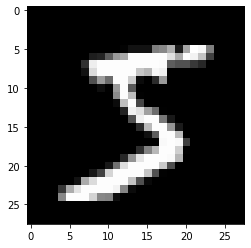

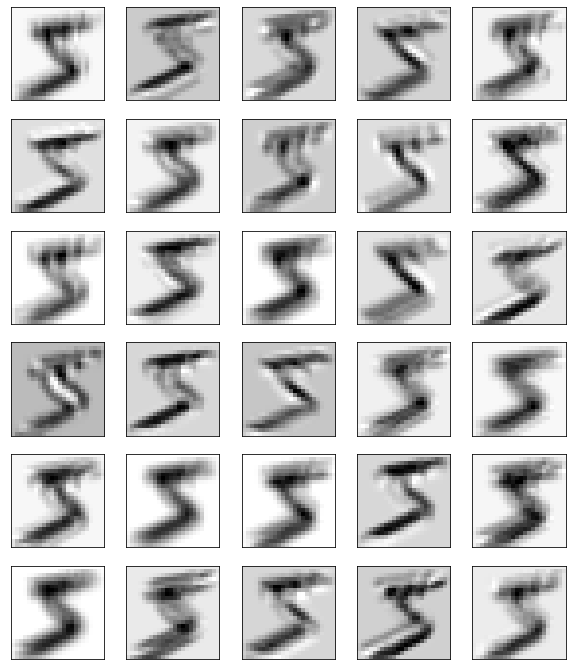

In [43]:
# to show, the first image in the training dataset.
img = X_train[0]
# To insert 'img' into 'plt.imshow',
# convert the 3-dimensional tensor into the 2-dimensional tensor.
# -> img[0]
plt.imshow(img[0], cmap = plt.cm.gray)

# To insert the 3-dimensional object, 'img', into SimpleConvNet,
# convert it into 4-dimensional tensor.
# That is, include channel
img = img.reshape(1, *img.shape)
out = network.layers['Conv1'].forward(img)

# to show the outputs generated by convolution layer of 'network' SimpleConvNet
fig = plt.figure(figsize = (10, 12))
for i in range(30):
    plt.subplot(6, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(out[0][i], cmap = plt.cm.gray)
plt.show()

In [40]:
def filter_show(filters, nx = 8, margin = 3, scale = 10):
    """
    https://gist.github.com/aidiary/07d530d5e08011832b12#file-draw_weight-py
    """
    
    FN, C, FH, FW = filters.shape
    ny = int(np.ceil(FN / nx))
    
    fig = plt.figure()
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1,
                        hspace = 0.05, wspace = 0.05)
    
    for i in range(FN):
        ax = fig.add_subplot(ny, nx, i + 1, xticks = [], yticks = [])
        ax.imshow(filters[i, 0], cmap = plt.cm.gray_r, interpolation = 'nearest')
    plt.show()

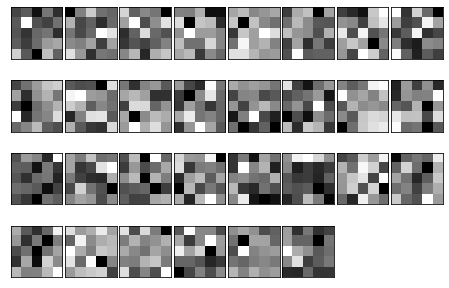

In [45]:
# via initialized weights (filters)
network = SimpleConvNet()
filter_show(network.params['W1'])

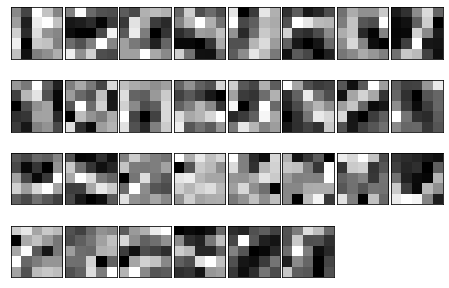

In [44]:
# via trained weights (filters) (Compare it to the filters above.)
network.load_params('params.pkl')
filter_show(network.params['W1'])

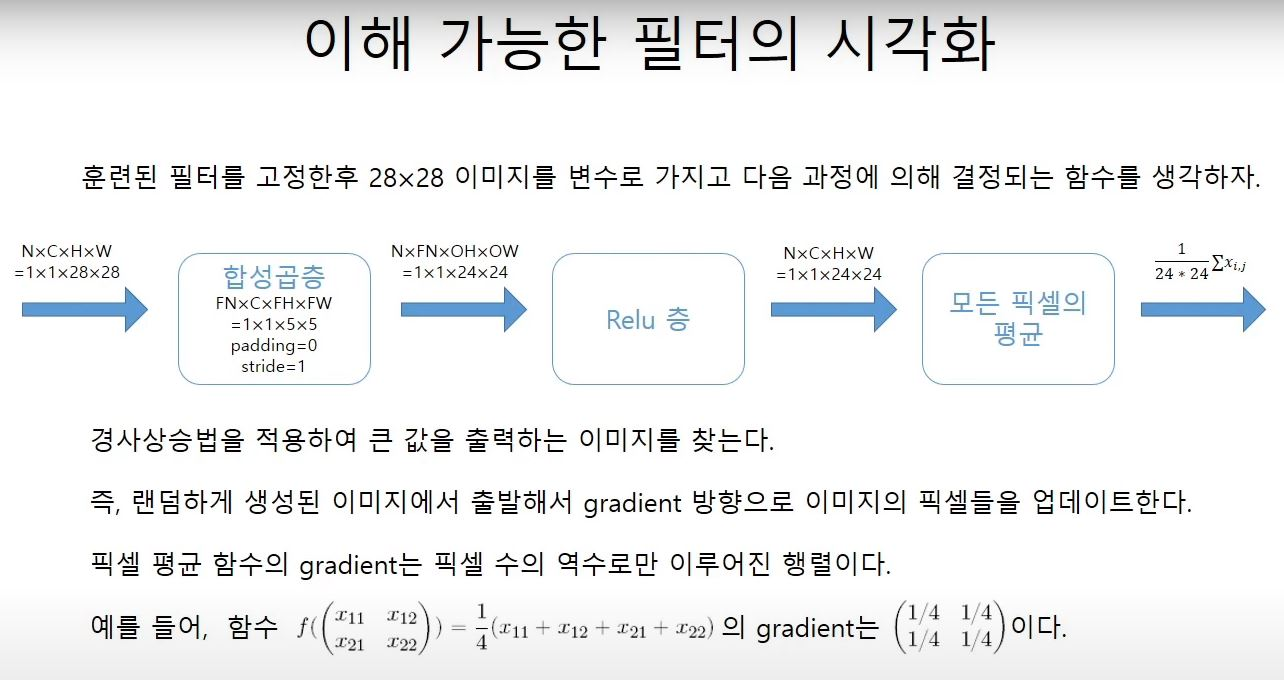

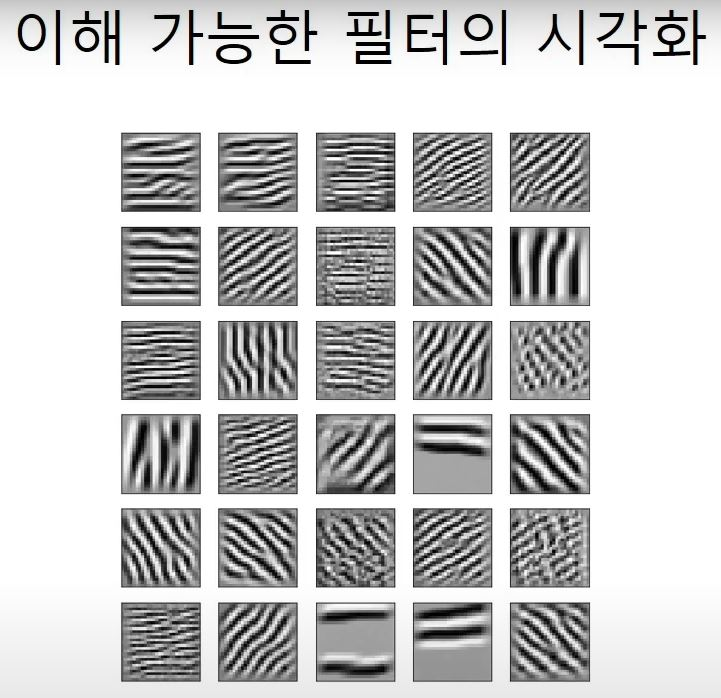

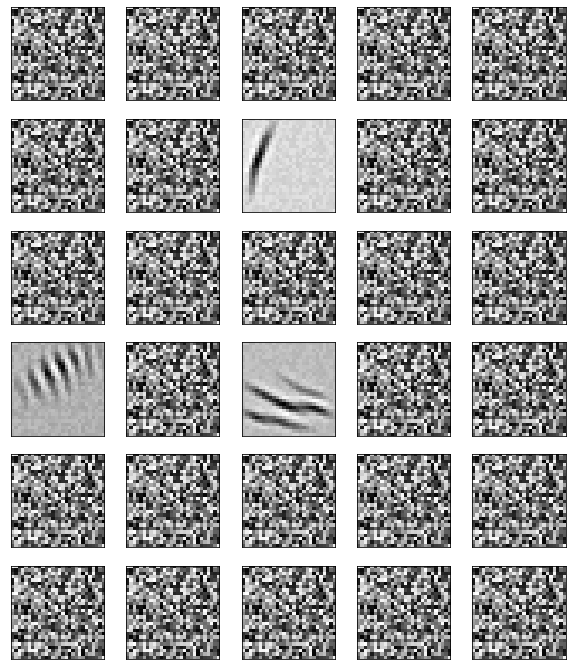

In [56]:
network = SimpleConvNet()
network.load_params('params.pkl')

img = np.random.rand(1, 1, 28, 28)

fig = plt.figure(figsize = (10, 12))

for i in range(30):
    plt.subplot(6, 5, i + 1)
    # Instantiate the i-th filter in the trained CNN.
    w = network.params['W1'][i] # w: C X FH X FW
    b = 0
    # Convert 'w' into a 4-dimensional tensor.
    w = w.reshape(1, *w.shape)
    conv_layer = Convolution(w, b)
    relu = ReLU()
    filter_img = img.copy()
    # gradient ascent for 5000 times
    for j in range(5000):
        # forward to get the information which is necessary for back prop
        out = conv_layer.forward(filter_img)
        out = relu.forward(out)
        # back prop
        dout = 1
        dout = (1 / out.size) * np.ones(out.shape) * dout
        dout = relu.backward(dout)
        dout = conv_layer.backward(dout)
        filter_img = filter_img + dout # '+': gradient descent
    plt.xticks([])
    plt.yticks([])
    plt.imshow(filter_img[0][0], cmap = plt.cm.gray)
plt.show()

# Using a Framework (TensorFlow, Keras)
---

Import Modules

In [1]:
import tensorflow as tf
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

Hyperparameter

In [2]:
EPOCHS = 10

Network Structure

In [3]:
# in contrast to the previous examples, using 'def' not 'class'..
# This is because in this case the method in Keras is applied.
# But this is not the case that every CNN works.
# Understand that if you were to use Keras, you need to define your
# network structure using 'def' not 'class'. That's all.
def MyModel():
    return Sequential([Conv2D(
        # 28 X 28 X 32 feature map
        32, (3, 3), padding = 'same', activation = 'relu'), MaxPool2D(),
                                      Conv2D(
        # 14 X 14 X 64 feature map
        64, (3, 3), padding = 'same', activation = 'relu'), MaxPool2D(),
                                      Conv2D(
        # 7 X 7 X 128 feature map
        128, (3, 3), padding = 'same', activation = 'relu'), MaxPool2D(),
        Flatten(), # 7 X 7 X 128 = 6272
        Dense(128, activation = 'relu'), # 128
        Dense(10, activation = 'softmax')])
    # 32, 64, 128: the number of CNN filters in each Conv2D layer
    # (3, 3): filter size
    # padding: for zero padding, use 'same' and
    # for reducing the size of the graphic data (2D), use 'valid'
    # Maxpool(): default -> 2X2

# Using Pooling, reduce the size of the graphic data (2D).
# Using Convolution, increase the number of channels.

Loading Data

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000).batch(32).prefetch(2048)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32).prefetch(2048)

In [5]:
print(x_train.shape)
print(x_train[0].shape)

(60000, 28, 28)
(28, 28)


In [6]:
# A dataset for a CNN need to be N X H X W X C (rank 4).
# N: batch
# H: height
# W: width
# C: channels

In [7]:
# '...': using the original contents
# 'np.newaxis': adding an axis
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000).batch(32).prefetch(2048)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32).prefetch(2048)

In [8]:
print(x_train.shape)
print(x_train[0].shape)

(60000, 28, 28, 1)
(28, 28, 1)


Generating a Model

In [9]:
model = MyModel()

model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

Training

In [10]:
# 1875 = 60000 / 32 -> It is using the size of 32 mini-batches.
model.fit(train_ds, validation_data = test_ds, epochs = EPOCHS)

Epoch 1/10
1875/1875 [==============================] - 16s 6ms/step - loss: 0.4261 - accuracy: 0.8462 - val_loss: 0.3494 - val_accuracy: 0.8685
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2721 - accuracy: 0.8993 - val_loss: 0.2857 - val_accuracy: 0.8977
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2274 - accuracy: 0.9161 - val_loss: 0.2552 - val_accuracy: 0.9117
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1981 - accuracy: 0.9265 - val_loss: 0.2459 - val_accuracy: 0.9086
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1716 - accuracy: 0.9352 - val_loss: 0.2439 - val_accuracy: 0.9180
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1488 - accuracy: 0.9451 - val_loss: 0.2490 - val_accuracy: 0.9184
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1318 - accuracy: 0.9509 - val_loss: 0.2572 - val_ac

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True